# Personal Loan Campaign Project
## Context:
AllLife Bank management wants to explore ways of converting its liability customers (depositors) to personal loan customers (while retaining them as depositors) to expand borrowers (asset customers) client base and increaser revenue via loan interests.

Previous year campaign showed a healthy conversion rate of over 9% success.
New campaign with improved target marketing is planned to increase the success ratio.

### Data:
Loan_Modelling.csv file contains the following information for analysis:

* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

## Objective: 
Build a model to identify the potential customers who have a higher probability of purchasing the loan:

* Predict whether a liability customer will buy a personal loan or not
* Which variables are most significant
* Which segment of customers should be targeted more

## Key steps of the project:
* Explore and visualize the dataset, perform an Exploratory Data Analysis
* Illustrate the insights based on EDA with key meaningful observations on the relationship between variables
* Clean and prepare the data
* Build a Logistic Regression Model, evaluate and improve model performance
* Build a Decistion Tree Model, evaluate and improve model performance
* Compare Decision Tree and Logistic Regression Models, conclude with the key takeaways for the marketing team
* Generate a set of insights and recommendations with advice on how to run the campaign

# 1. Loading Python packages and data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings("ignore")
# # this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black
# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# sns.set()

# to split the data into train and test
from sklearn.model_selection import train_test_split

# Libraries for Logistic Regression
from sklearn.linear_model import LogisticRegression

# Libraries for Decistion Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.tree import plot_tree

# # to check model performance
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    make_scorer,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
)

<IPython.core.display.Javascript object>

In [2]:
# Import the dataset
data_backup = pd.read_csv("Loan_Modelling.csv")

<IPython.core.display.Javascript object>

In [3]:
# Creating original's data copy
data = data_backup.copy()

<IPython.core.display.Javascript object>

# 2. Basic overview of the data

In [4]:
# Displaying sample rows
data.sample(5)

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
816    817   49          23      65    94035       3    0.7          2   
2025  2026   47          20      79    94720       3    2.0          2   
1942  1943   61          36      29    90210       2    0.5          2   
2051  2052   34           8      38    90018       4    0.2          1   
4619  4620   61          36      23    95521       1    0.1          1   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
816        263              0                   0           0       1   
2025       185              0                   1           0       0   
1942         0              0                   0           0       1   
2051         0              0                   0           0       0   
4619        96              0                   0           0       0   

      CreditCard  
816            1  
2025           0  
1942           0  
2051           0  
4619           0

<IPython.core.display.Javascript object>

In [5]:
# Checking the shape of the data
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")  # f-string

There are 5000 rows and 14 columns.


<IPython.core.display.Javascript object>

In [6]:
# Checking column names and corresponding data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


<IPython.core.display.Javascript object>

In [7]:
# Brief statistical summary of the data
data.describe(include="all").T

count          mean          std      min       25%  \
ID                  5000.0   2500.500000  1443.520003      1.0   1250.75   
Age                 5000.0     45.338400    11.463166     23.0     35.00   
Experience          5000.0     20.104600    11.467954     -3.0     10.00   
Income              5000.0     73.774200    46.033729      8.0     39.00   
ZIPCode             5000.0  93169.257000  1759.455086  90005.0  91911.00   
Family              5000.0      2.396400     1.147663      1.0      1.00   
CCAvg               5000.0      1.937938     1.747659      0.0      0.70   
Education           5000.0      1.881000     0.839869      1.0      1.00   
Mortgage            5000.0     56.498800   101.713802      0.0      0.00   
Personal_Loan       5000.0      0.096000     0.294621      0.0      0.00   
Securities_Account  5000.0      0.104400     0.305809      0.0      0.00   
CD_Account          5000.0      0.060400     0.238250      0.0      0.00   
Online              5000.0      0.596800     0.490589      0.0      0.00   
CreditCard          5000.0      0.294000     0.455637      0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIPCode             93437.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Personal_Loan           0.0      0.00      1.0  
Securities_Account      0.0      0.00      1.0  
CD_Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0

<IPython.core.display.Javascript object>

In [8]:
# Looking at statistics for categorical data
cat_columns = data[
    [
        "Family",
        "Education",
        "Personal_Loan",
        "Securities_Account",
        "CD_Account",
        "Online",
        "CreditCard",
    ]
]
for column in cat_columns:
    print(data[column].value_counts())
    print("-" * 50)

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64
--------------------------------------------------
1    2096
3    1501
2    1403
Name: Education, dtype: int64
--------------------------------------------------
0    4520
1     480
Name: Personal_Loan, dtype: int64
--------------------------------------------------
0    4478
1     522
Name: Securities_Account, dtype: int64
--------------------------------------------------
0    4698
1     302
Name: CD_Account, dtype: int64
--------------------------------------------------
1    2984
0    2016
Name: Online, dtype: int64
--------------------------------------------------
0    3530
1    1470
Name: CreditCard, dtype: int64
--------------------------------------------------


<IPython.core.display.Javascript object>

In [9]:
# Checking missing values
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

<IPython.core.display.Javascript object>

<font color = 'darkblue'>
    
**Observations:**
    
* Data contains information about 5000 customers
* All data is in numerical format
* There are no apparent missing values
* All variables have reasonable statistical values except Experience, that has negative values, that need to be looked at.
* Target variable "Personal_Loan" is highly imbalanced at roughly 1:10 ratio

## Initial data pre-processing for EDA

In [1]:
# Dropping out unnecessary "ID" column
data.drop(["ID"], axis=1, inplace=True)

NameError: name 'data' is not defined

#### Correcting "Experience" variable

In [11]:
# Printing out the statistics of negative values of "Experience" for varous age groups
data.loc[data["Experience"] < 0][["Experience", "Age"]].groupby(
    ["Experience", "Age"]
).size().unstack(fill_value=0)

Age         23  24  25  26  28  29
Experience                        
-3           2   2   0   0   0   0
-2           4   9   1   0   1   0
-1           6   6  17   1   0   3

<IPython.core.display.Javascript object>

<font color = 'darkblue'>
We observe that there are negative values for Ages 23-26, 28,29

In [12]:
# Let's create a temporary column "Experience_Nulled", replace negative values with NaN
# to calculate median for Ages 23-29 that will be used for imputing

data["Experience_Nulled"] = data["Experience"]
data["Experience_Nulled"][data["Experience_Nulled"] < 0] = np.nan
data.head()
# Checking the replacement result
data[data["Age"] < 30].groupby("Age").Experience_Nulled.median()

Age
23    NaN
24    0.0
25    1.0
26    1.0
27    2.0
28    3.0
29    4.0
Name: Experience_Nulled, dtype: float64

<IPython.core.display.Javascript object>

In [13]:
# Checking the median values for Experience for various age groups in the original dataset
data[data["Age"] < 30].groupby("Age").Experience.median()

Age
23   -1.5
24   -1.0
25    0.0
26    1.0
27    2.0
28    3.0
29    4.0
Name: Experience, dtype: float64

<IPython.core.display.Javascript object>

<font color = 'darkblue'>
We can see that for ages 23 and 24 we need to impute negative experience with 0, age 25 with 1 and for ages 26-29 we can impute with median values from the original dataset

In [14]:
# Replacing values
data["Experience"][(data["Experience"] < 0) & (data["Age"] == 23)] = 0
data["Experience"][(data["Experience"] < 0) & (data["Age"] == 24)] = 0
data["Experience"][(data["Experience"] < 0) & (data["Age"] == 25)] = 1
data["Experience"][(data["Experience"] < 0) & (data["Age"] == 26)] = data[
    data["Age"] == 26
].Experience.median()
data["Experience"][(data["Experience"] < 0) & (data["Age"] == 28)] = data[
    data["Age"] == 28
].Experience.median()
data["Experience"][(data["Experience"] < 0) & (data["Age"] == 29)] = data[
    data["Age"] == 29
].Experience.median()

<IPython.core.display.Javascript object>

In [15]:
data.head()

Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   25           1      49    91107       4    1.6          1         0   
1   45          19      34    90089       3    1.5          1         0   
2   39          15      11    94720       1    1.0          1         0   
3   35           9     100    94112       1    2.7          2         0   
4   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  \
0              0                   1           0       0           0   
1              0                   1           0       0           0   
2              0                   0           0       0           0   
3              0                   0           0       0           0   
4              0                   0           0       0           1   

   Experience_Nulled  
0                1.0  
1               19.0  
2               15.0  
3                9.0  
4                8.0

<IPython.core.display.Javascript object>

In [16]:
# Checking the result and removing temporary column
data.drop("Experience_Nulled", axis=1, inplace=True)
data[data["Age"] < 30].groupby("Age").Experience.median()

Age
23    0
24    0
25    1
26    1
27    2
28    3
29    4
Name: Experience, dtype: int64

<IPython.core.display.Javascript object>

# 2. Exploratory Data Analysis

## 2.1 Univariate analysis

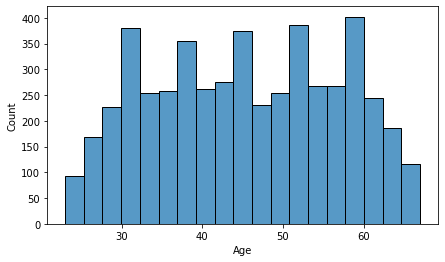

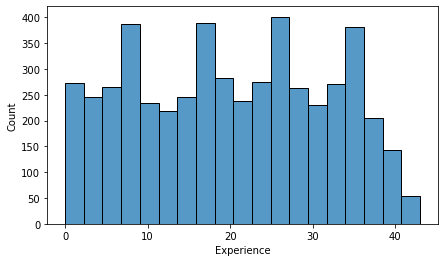

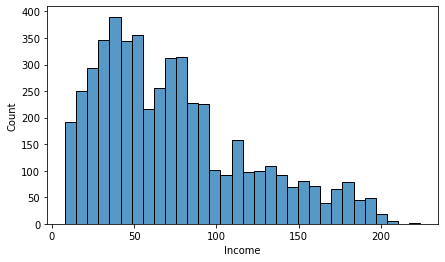

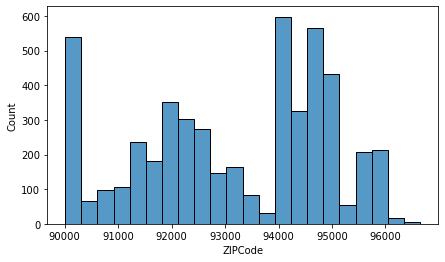

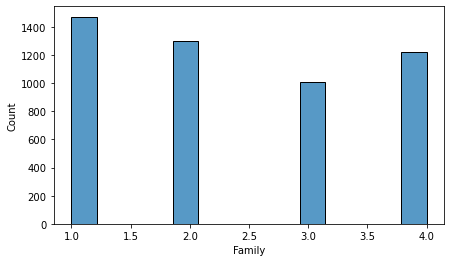

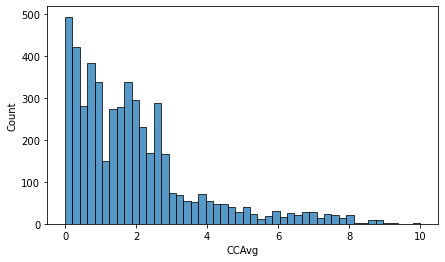

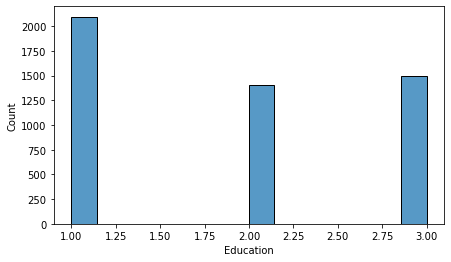

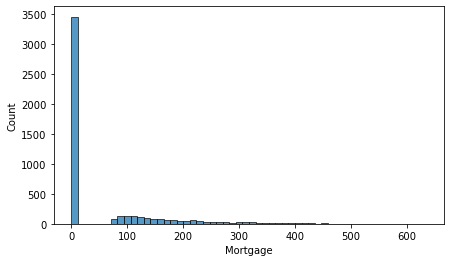

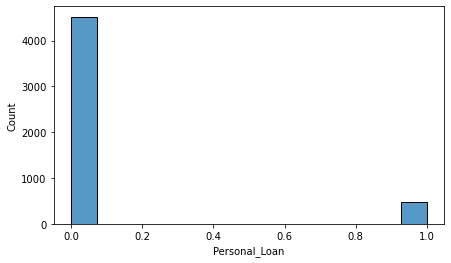

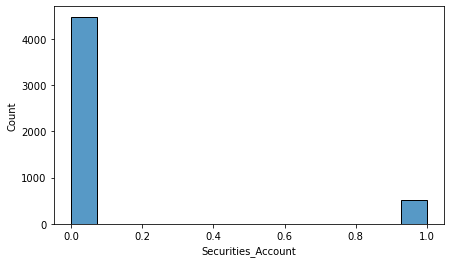

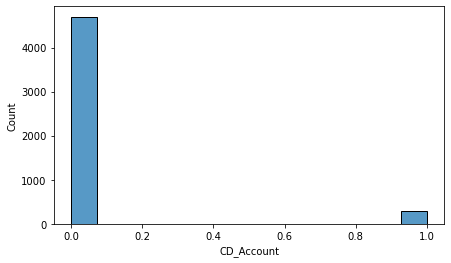

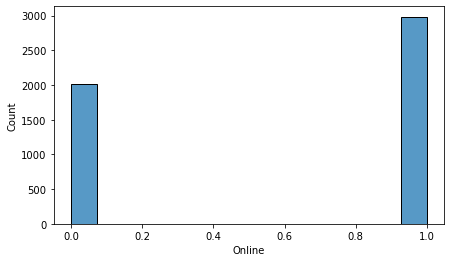

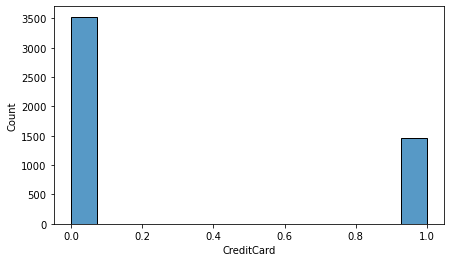

<IPython.core.display.Javascript object>

In [17]:
# let's plot all the columns to look at their distributions to get a general sense of how data looks like
for i in data.columns:
    plt.figure(figsize=(7, 4))
    sns.histplot(data=data, x=i)
    plt.show()

In [18]:
# Creating a function to visualize boxplot and histogram for any input numerical variable along the same scale
def histogram_boxplot(data, feature, figsize=(7, 4), kde=False, bins=None):
    """
    Boxplot and histogram combined
    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data,
        x=feature,
        kde=True,
        hue="Personal_Loan",
        ax=ax_hist2,
        bins=bins,
        palette="winter",
    ) if bins else sns.histplot(
        data=data, x=feature, kde=True, hue="Personal_Loan", ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

#### Age and Experience

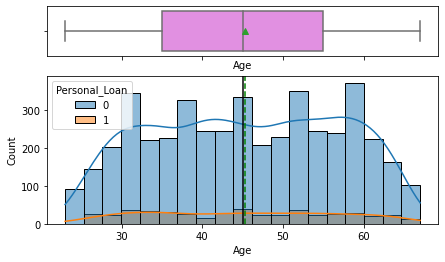

<IPython.core.display.Javascript object>

In [19]:
histogram_boxplot(data, "Age")

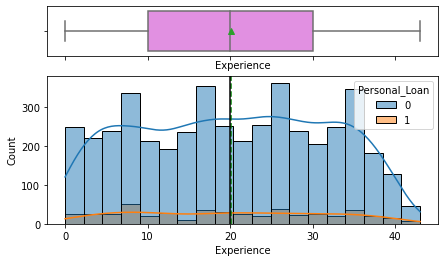

<IPython.core.display.Javascript object>

In [20]:
histogram_boxplot(data, "Experience")

<font color = 'darkblue'>
No indication that customers with personal loans fall into specific Age or Experience group

#### Income

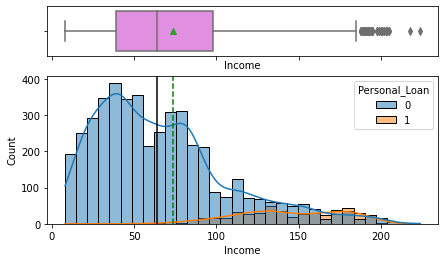

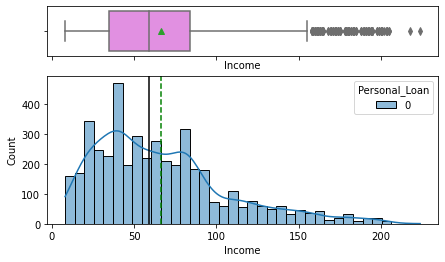

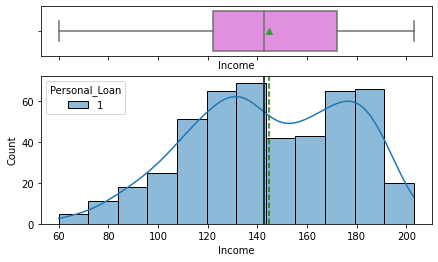

<IPython.core.display.Javascript object>

In [21]:
histogram_boxplot(data, "Income")
histogram_boxplot(data[data["Personal_Loan"] == 0], "Income")
histogram_boxplot(data[data["Personal_Loan"] == 1], "Income")
# plt.text(10, 120, "Customers with Personal Loan Income")

<font color = 'darkblue'>
Customers holding personal loans with the bank tend have higher income (60K+, IQR of 120-175K)

#### Zipcode

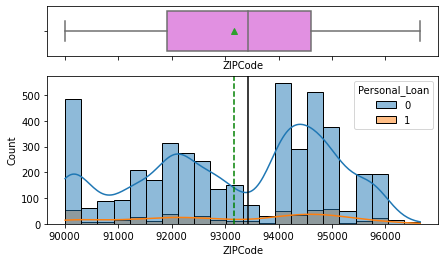

<IPython.core.display.Javascript object>

In [22]:
histogram_boxplot(data, "ZIPCode")

<font color = 'darkblue'>
No indication that customers with personal loans fall into any specific Zipcode regions

#### CCAvg

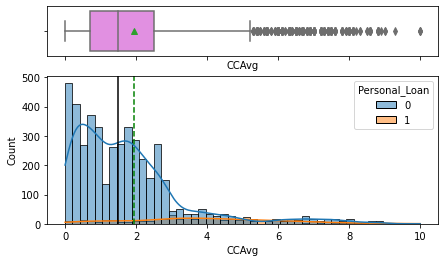

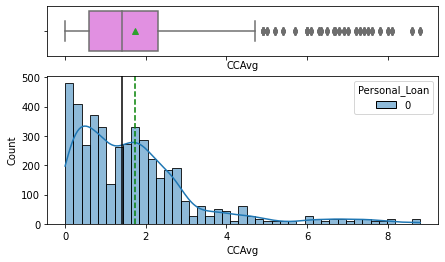

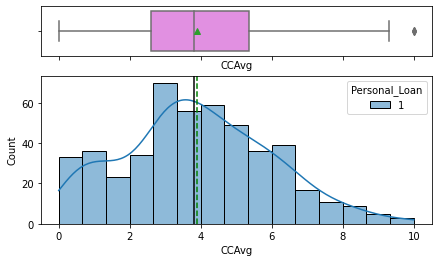

<IPython.core.display.Javascript object>

In [23]:
histogram_boxplot(data, "CCAvg")
histogram_boxplot(data[data["Personal_Loan"] == 0], "CCAvg")
histogram_boxplot(data[data["Personal_Loan"] == 1], "CCAvg")

<font color = 'darkblue'>
    
* CCAvg has a right skewed distribution. Majority of customers have 0-3K of average credit card spendings per month.
* Right skewness is mainly influenced by customers without personal loans, who are a majority. They tend to have 0-3K of average credit card spending per month
* CCAvg for customers with personal loans has close to normal, slightly right skewed distribution with mean around 4K of average credit card spendings per month. It also indicates that customers with 0-3K CCAg find personal loans useful. This group represents only decimal part of the total customers and great potential in increasing personal loan customer base exists for this spending group

**Let's plot the log scaled CCAvg to observe any changes in breakdown for customers with and without personal loans as well any potential outliers that require treatment**

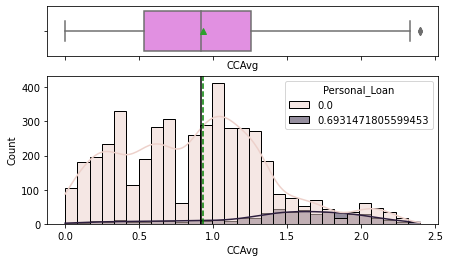

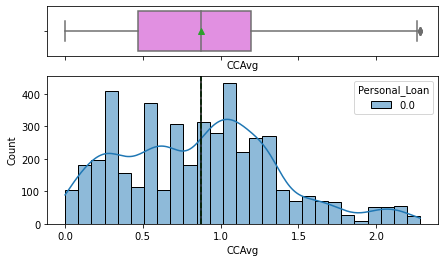

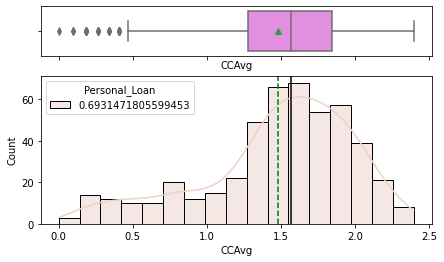

<IPython.core.display.Javascript object>

In [24]:
histogram_boxplot(np.log(data + 1), "CCAvg")
histogram_boxplot(np.log(data[data["Personal_Loan"] == 0] + 1), "CCAvg")
histogram_boxplot(np.log(data[data["Personal_Loan"] == 1] + 1), "CCAvg")

<font color = 'darkblue'>
In the log scale we observe a better differentiation for customers with and without personal loans, customers with personal loans having higher CCAvg numbers

#### Mortgage

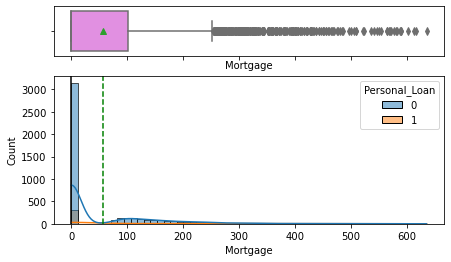

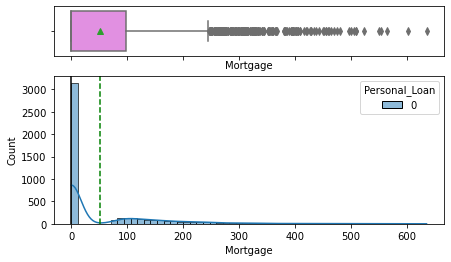

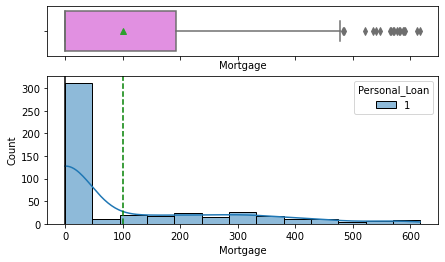

<IPython.core.display.Javascript object>

In [25]:
histogram_boxplot(data, "Mortgage")
histogram_boxplot(data[data["Personal_Loan"] == 0], "Mortgage")
histogram_boxplot(data[data["Personal_Loan"] == 1], "Mortgage")

<font color = 'darkblue'>
Mortgage has a highly right skewed distribution with 0 values overpowering the plot. Let's see if log scaling will improve the plot

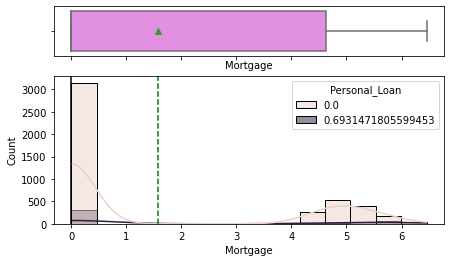

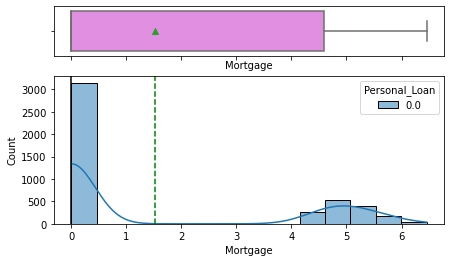

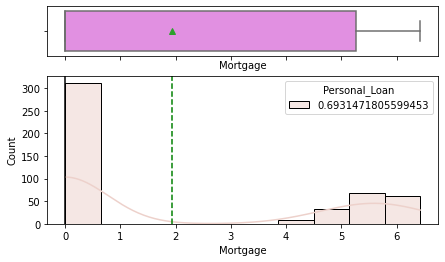

<IPython.core.display.Javascript object>

In [26]:
histogram_boxplot(np.log(data + 1), "Mortgage")
histogram_boxplot(np.log(data[data["Personal_Loan"] == 0] + 1), "Mortgage")
histogram_boxplot(np.log(data[data["Personal_Loan"] == 1] + 1), "Mortgage")

<font color = 'darkblue'>
There is an improvement in the plots and we observe a slight difference in distributions for customers with and without personal loans for morgaged customers. However 0 mortgage values still overpower the distribution to make any valuable insight. Let's see if splitting the mortgaged and non-mortgaged customers will help

In [27]:
# Creating temporary "Mortgage_Presence" and "Mortgage_Cropped" columns to analyze personal loan presence for mortgaged only customers
data["Mortgage_Presence"] = data["Mortgage"]
data["Mortgage_Cropped"] = data["Mortgage"]
data["Mortgage_Cropped"][data["Mortgage_Cropped"] == 0] = np.nan
data["Mortgage_Presence"][data["Mortgage_Presence"] == 0] = 0
data["Mortgage_Presence"][data["Mortgage_Presence"] > 0] = 1
data.sample(10)

Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
4638   37          13      89    91711       2    1.7          2         0   
4449   30           6      44    95211       1    0.2          3         0   
2993   65          40      20    92647       3    0.1          3         0   
2905   64          40       8    94110       2    0.3          3         0   
479    60          36     132    92154       2    6.0          1       470   
3493   54          28      33    94710       2    0.4          3         0   
2102   25           1      81    92647       2    1.6          3         0   
1993   30           5     122    94545       2    3.1          1         0   
3470   57          31     175    90503       2    0.5          1       429   
1012   50          25      40    95820       1    1.3          2         0   

      Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  \
4638              0                   0           0       1           0   
4449              0                   0           0       0           1   
2993              0                   0           0       0           1   
2905              0                   0           0       1           0   
479               0                   0           0       1           1   
3493              0                   0           0       1           0   
2102              0                   0           0       1           1   
1993              0                   0           0       0           0   
3470              0                   0           0       1           1   
1012              0                   0           0       1           1   

      Mortgage_Presence  Mortgage_Cropped  
4638                  0               NaN  
4449                  0               NaN  
2993                  0               NaN  
2905                  0               NaN  
479                   1             470.0  
3493                  0               NaN  
2102                  0               NaN  
1993                  0               NaN  
3470                  1             429.0  
1012                  0               NaN

<IPython.core.display.Javascript object>

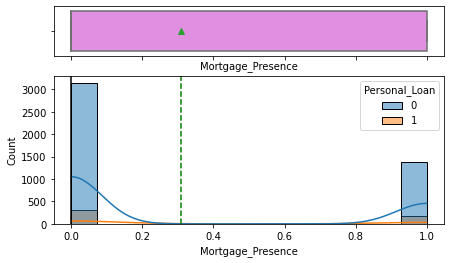

<IPython.core.display.Javascript object>

In [28]:
histogram_boxplot(data, "Mortgage_Presence")

In [29]:
# Printing out the statistics of negative values of "Experience" for varous age groups
data[["Personal_Loan", "Mortgage_Presence"]].groupby(
    ["Personal_Loan", "Mortgage_Presence"]
).size().unstack(fill_value=0)

Mortgage_Presence     0     1
Personal_Loan                
0                  3150  1370
1                   312   168

<IPython.core.display.Javascript object>

<font color = 'darkblue'>
We can see that distribution of customers with personal loan is proportional and there is no clear distinction on where customer has or does not have a mortgage

**Let's visualize distrubution of Mortgage variable for mortgaged only customers**

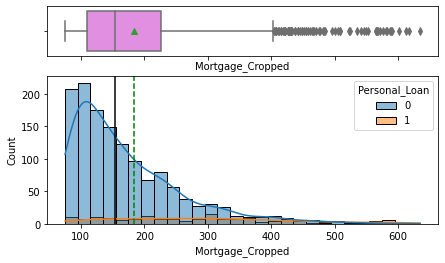

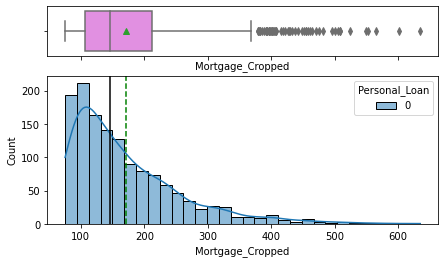

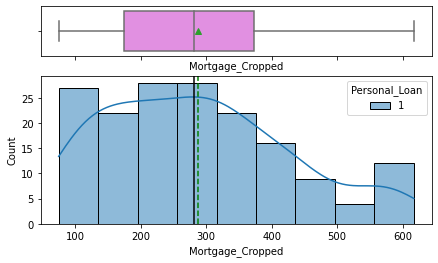

<IPython.core.display.Javascript object>

In [30]:
histogram_boxplot(data, "Mortgage_Cropped")
histogram_boxplot(data[data["Personal_Loan"] == 0], "Mortgage_Cropped")
histogram_boxplot(data[data["Personal_Loan"] == 1], "Mortgage_Cropped")

<font color = 'darkblue'>
Distribution is right skewed, let's log scale it to see if we can obtain better separation

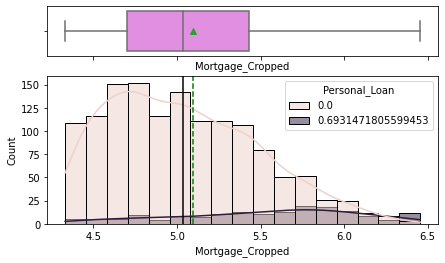

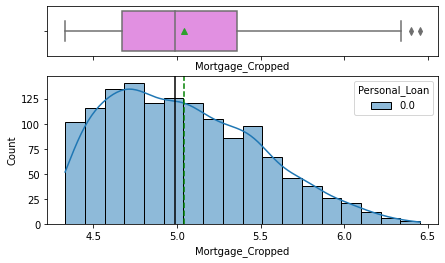

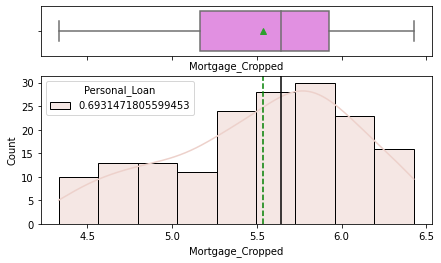

<IPython.core.display.Javascript object>

In [31]:
histogram_boxplot(np.log(data + 1), "Mortgage_Cropped")
histogram_boxplot(np.log(data[data["Personal_Loan"] == 0] + 1), "Mortgage_Cropped")
histogram_boxplot(np.log(data[data["Personal_Loan"] == 1] + 1), "Mortgage_Cropped")

<font color = 'darkblue'>
We observe that in log scaled domain customers with higher mortgages (5.2K+) tend to have personal loans more frequetnly than with lower mortgages and there is a big potential in increasing customer base

### Categorical variables

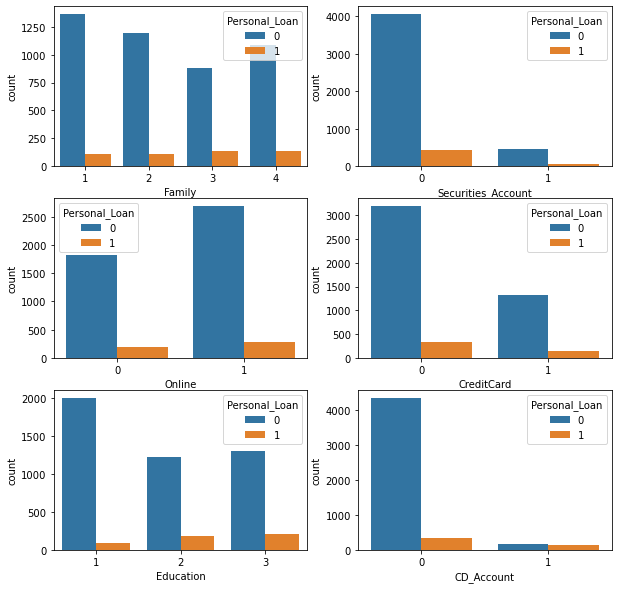

<IPython.core.display.Javascript object>

In [32]:
fig, axes = plt.subplots(figsize=(10, 10))
plt.subplot(3, 2, 1)
sns.countplot(data["Family"], hue=data["Personal_Loan"])
plt.subplot(3, 2, 2)
sns.countplot(data["Securities_Account"], hue=data["Personal_Loan"])
plt.subplot(3, 2, 3)
sns.countplot(data["Online"], hue=data["Personal_Loan"])
plt.subplot(3, 2, 4)
sns.countplot(data["CreditCard"], hue=data["Personal_Loan"])
plt.subplot(3, 2, 5)
sns.countplot(data["Education"], hue=data["Personal_Loan"])
plt.subplot(3, 2, 6)
sns.countplot(data["CD_Account"], hue=data["Personal_Loan"])
plt.show()

<font color = 'darkblue'>
    
1. There is no direct dependency of personal loans vs family size
2. Majority of customers do not have security accounts tend to have more personal loan accounts
3. Number of customers benefiting from online banking is higher and customers with personal loans tend to use it more as well
4. Customers using external credit cards have fewer personal loans inside the bank
5. Personal loans quianity increases with Education, Customers with undergraduate degrees and less tend to have fewer personal loans, Advanced/Professional educated group has more personal loans
6. Majority of customers do not have certificate of deposit (CD) account with the bank, however they tend to have more personal loan accounts

## Mutlivariate Analysis

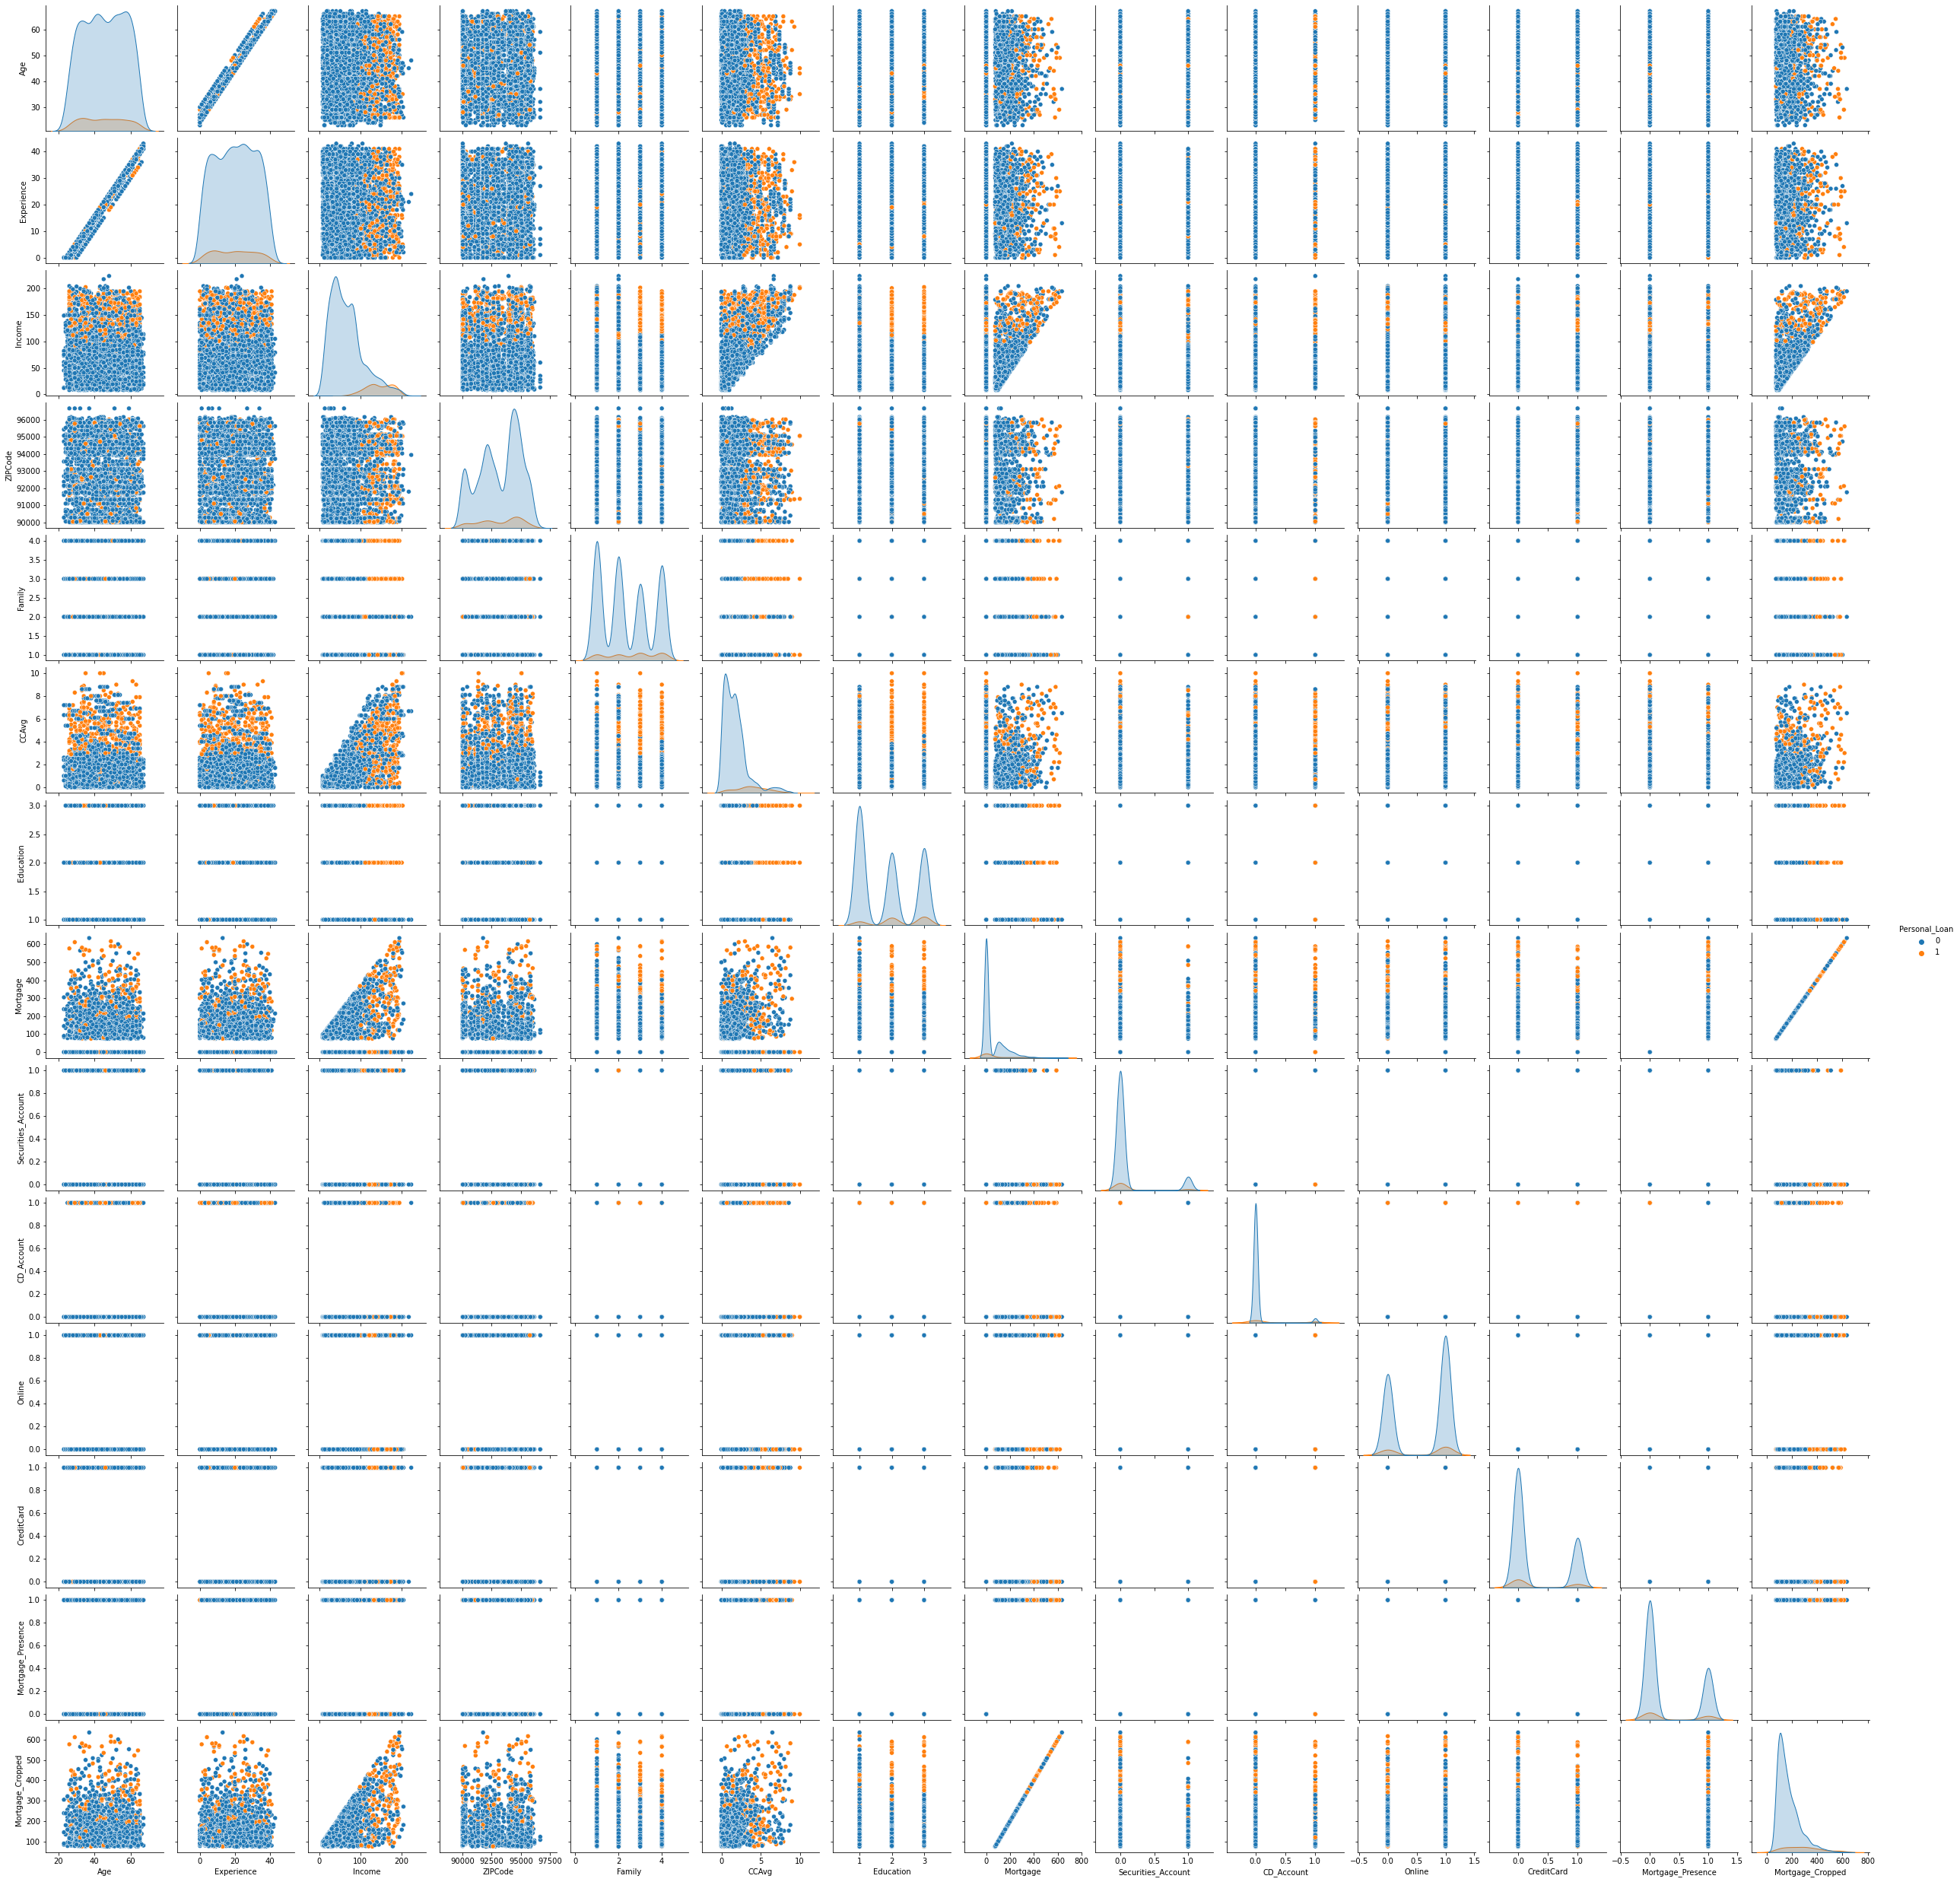

<IPython.core.display.Javascript object>

In [33]:
# Let's visualize pairplot
sns.pairplot(data=data, hue="Personal_Loan", diag_kind="kde", corner=False)
plt.show()

In [34]:
# Correlation table
data.corr()

Age  Experience    Income   ZIPCode    Family  \
Age                 1.000000    0.994214 -0.055269 -0.030530 -0.046418   
Experience          0.994214    1.000000 -0.046880 -0.030403 -0.052119   
Income             -0.055269   -0.046880  1.000000 -0.030709 -0.157501   
ZIPCode            -0.030530   -0.030403 -0.030709  1.000000  0.027512   
Family             -0.046418   -0.052119 -0.157501  0.027512  1.000000   
CCAvg              -0.052012   -0.050030  0.645984 -0.012188 -0.109275   
Education           0.041334    0.014071 -0.187524 -0.008266  0.064929   
Mortgage           -0.012539   -0.010950  0.206806  0.003614 -0.020445   
Personal_Loan      -0.007726   -0.008060  0.502462 -0.002974  0.061367   
Securities_Account -0.000436   -0.001258 -0.002616  0.002422  0.019994   
CD_Account          0.008043    0.009905  0.169738  0.021671  0.014110   
Online              0.013702    0.013765  0.014206  0.028317  0.010354   
CreditCard          0.007681    0.009073 -0.002385  0.024033  0.011588   
Mortgage_Presence  -0.009545   -0.008889 -0.003688  0.006470  0.005037   
Mortgage_Cropped   -0.015003   -0.011596  0.666606 -0.005826 -0.081108   

                       CCAvg  Education  Mortgage  Personal_Loan  \
Age                -0.052012   0.041334 -0.012539      -0.007726   
Experience         -0.050030   0.014071 -0.010950      -0.008060   
Income              0.645984  -0.187524  0.206806       0.502462   
ZIPCode            -0.012188  -0.008266  0.003614      -0.002974   
Family             -0.109275   0.064929 -0.020445       0.061367   
CCAvg               1.000000  -0.136124  0.109905       0.366889   
Education          -0.136124   1.000000 -0.033327       0.136722   
Mortgage            0.109905  -0.033327  1.000000       0.142095   
Personal_Loan       0.366889   0.136722  0.142095       1.000000   
Securities_Account  0.015086  -0.010812 -0.005411       0.021954   
CD_Account          0.136534   0.013934  0.089311       0.316355   
Online             -0.003611  -0.015004 -0.005995       0.006278   
CreditCard         -0.006689  -0.011014 -0.007231       0.002802   
Mortgage_Presence  -0.011398  -0.000505  0.833466       0.029940   
Mortgage_Cropped    0.390406  -0.107112  1.000000       0.360987   

                    Securities_Account  CD_Account    Online  CreditCard  \
Age                          -0.000436    0.008043  0.013702    0.007681   
Experience                   -0.001258    0.009905  0.013765    0.009073   
Income                       -0.002616    0.169738  0.014206   -0.002385   
ZIPCode                       0.002422    0.021671  0.028317    0.024033   
Family                        0.019994    0.014110  0.010354    0.011588   
CCAvg                         0.015086    0.136534 -0.003611   -0.006689   
Education                    -0.010812    0.013934 -0.015004   -0.011014   
Mortgage                     -0.005411    0.089311 -0.005995   -0.007231   
Personal_Loan                 0.021954    0.316355  0.006278    0.002802   
Securities_Account            1.000000    0.317034  0.012627   -0.015028   
CD_Account                    0.317034    1.000000  0.175880    0.278644   
Online                        0.012627    0.175880  1.000000    0.004210   
CreditCard                   -0.015028    0.278644  0.004210    1.000000   
Mortgage_Presence            -0.002221    0.040212 -0.004310   -0.004920   
Mortgage_Cropped             -0.011666    0.164898 -0.007831   -0.010249   

                    Mortgage_Presence  Mortgage_Cropped  
Age                         -0.009545         -0.015003  
Experience                  -0.008889         -0.011596  
Income                      -0.003688          0.666606  
ZIPCode                      0.006470         -0.005826  
Family                       0.005037         -0.081108  
CCAvg                       -0.011398          0.390406  
Education                   -0.000505         -0.107112  
Mortgage                     0.833466          1.000000  
Personal_Loa

<IPython.core.display.Javascript object>

<AxesSubplot:>

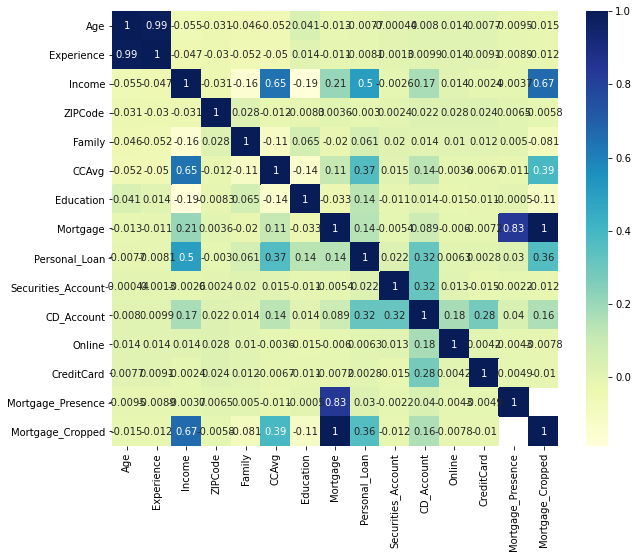

<IPython.core.display.Javascript object>

In [35]:
# Displaying visual correlations via heatmap
plt.figure(figsize=(10, 8))  # setting the figure size
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")

<font color = 'darkblue'>
    
**Observations**

* Very high correlation of Age and Experience (0.99)
* Good correlation of 0.65 between Income and CCAvg
* Some correlatiom of 0.5 between Income and Personal_Loan

There is a visual separation of personal loan for a number of variables like Income, CCAvg, etc that need to be looked into in more details to aid the marketing campaign

### Numerical vs Numerical Scatterplots

#### Income vs CCAvg

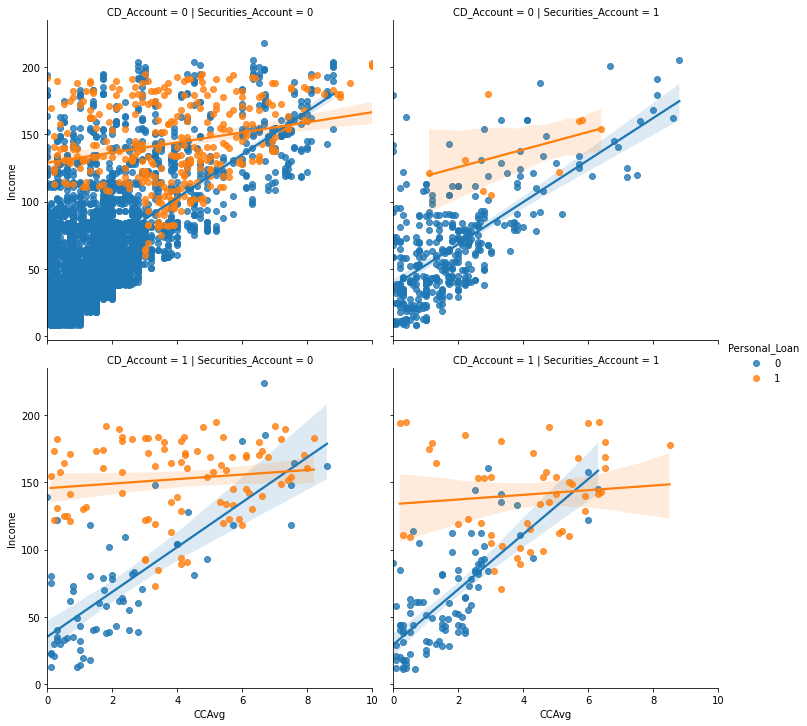

<IPython.core.display.Javascript object>

In [36]:
sns.lmplot(
    x="CCAvg",
    y="Income",
    data=data,
    fit_reg=True,
    hue="Personal_Loan",
    row="CD_Account",
    col="Securities_Account",
)
plt.show()

#### Income vs Mortgage

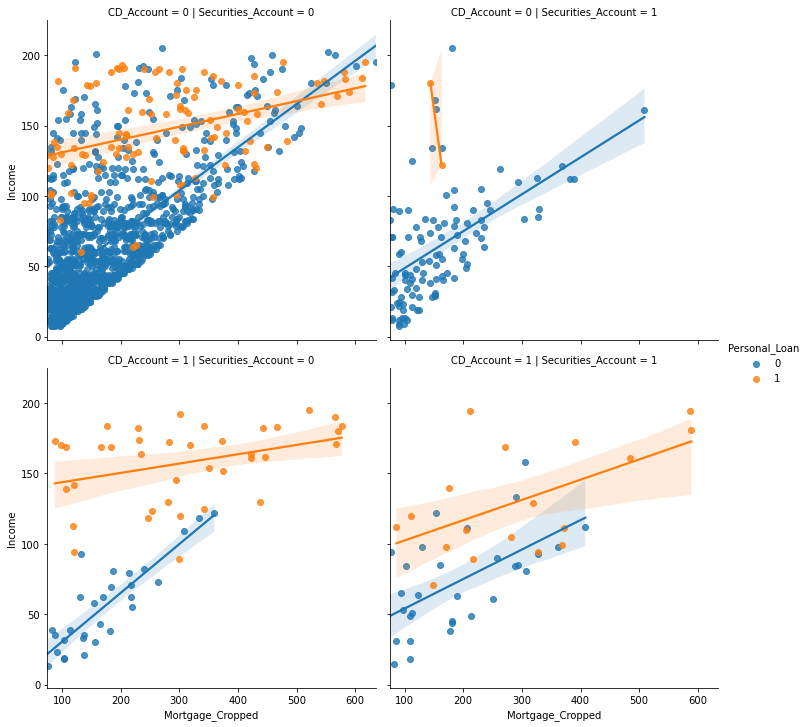

<IPython.core.display.Javascript object>

In [37]:
sns.lmplot(
    x="Mortgage_Cropped",
    y="Income",
    data=data,
    fit_reg=True,
    hue="Personal_Loan",
    row="CD_Account",
    col="Securities_Account",
)
plt.show()

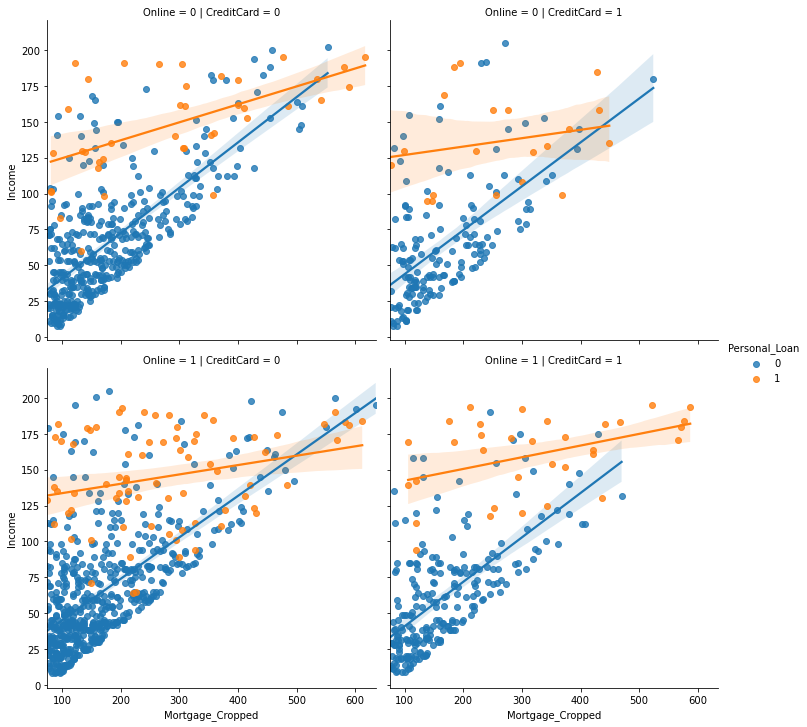

<IPython.core.display.Javascript object>

In [38]:
sns.lmplot(
    x="Mortgage_Cropped",
    y="Income",
    data=data,
    fit_reg=True,
    hue="Personal_Loan",
    row="Online",
    col="CreditCard",
)
plt.show()

<font color = 'darkblue'>
    
**Observations**
    
* We observe that in Income vs CCAvg domain customers who do and do not have personal loans have good correlation within their own groups with distinctive trends giving a good basis for classification results
* Customers who own Personal loans and Securities account fall withith a much narrow group in income (100-150K) 
* in Income vs Mortgage domain customers who do and do not have personal loans have a complete separation depending whether they have CD accounts or not. That also sets a good basis for classification results

### Numerical vs Categorical plots

#### Income, CCAvg and Mortgage vs Family, Education and CD_Account

<AxesSubplot:xlabel='CD_Account', ylabel='Income'>

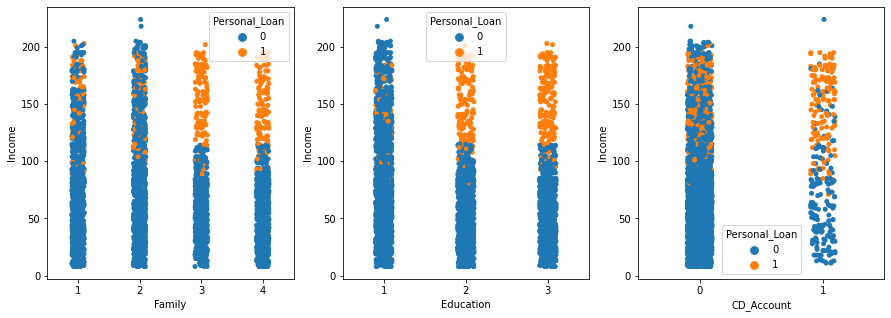

<IPython.core.display.Javascript object>

In [39]:
fig, axes = plt.subplots(1, 3, sharex=False, figsize=(15, 5))

sns.stripplot(x="Family", y="Income", hue="Personal_Loan", data=data, ax=axes[0])
sns.stripplot(x="Education", y="Income", hue="Personal_Loan", data=data, ax=axes[1])
sns.stripplot(x="CD_Account", y="Income", hue="Personal_Loan", data=data, ax=axes[2])

<AxesSubplot:xlabel='CD_Account', ylabel='CCAvg'>

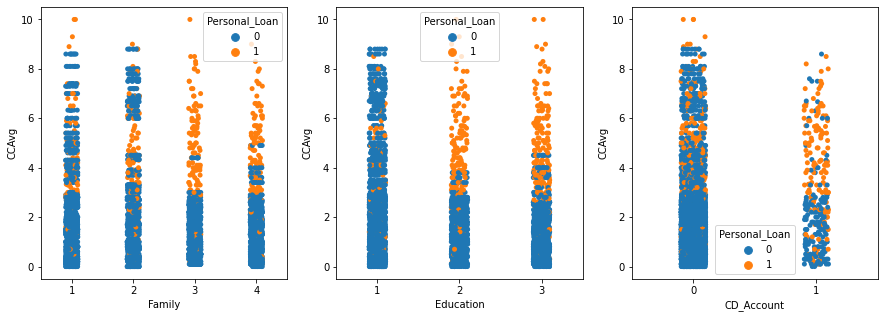

<IPython.core.display.Javascript object>

In [40]:
fig, axes = plt.subplots(1, 3, sharex=False, figsize=(15, 5))

sns.stripplot(x="Family", y="CCAvg", hue="Personal_Loan", data=data, ax=axes[0])
sns.stripplot(x="Education", y="CCAvg", hue="Personal_Loan", data=data, ax=axes[1])
sns.stripplot(x="CD_Account", y="CCAvg", hue="Personal_Loan", data=data, ax=axes[2])

<AxesSubplot:xlabel='CD_Account', ylabel='Mortgage'>

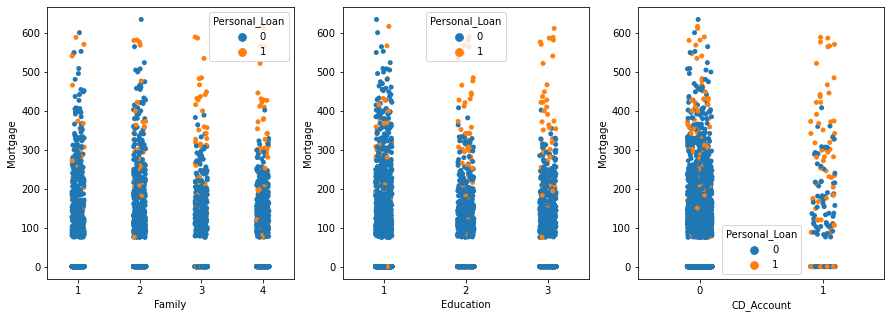

<IPython.core.display.Javascript object>

In [41]:
fig, axes = plt.subplots(1, 3, sharex=False, figsize=(15, 5))

sns.stripplot(x="Family", y="Mortgage", hue="Personal_Loan", data=data, ax=axes[0])
sns.stripplot(x="Education", y="Mortgage", hue="Personal_Loan", data=data, ax=axes[1])
sns.stripplot(x="CD_Account", y="Mortgage", hue="Personal_Loan", data=data, ax=axes[2])

<font color = 'darkblue'>
There is a consistent pattern of customers having Personal loan with Family of 3 and 4, Education of 2 and 3, owing CD Account and with higher Income, CCAvg and Mortgage

### Income, CCAvg and Mortgage vs Family, Education and CD_Account (Categorical vs Categorical)

#### Family

<AxesSubplot:xlabel='Securities_Account', ylabel='Family'>

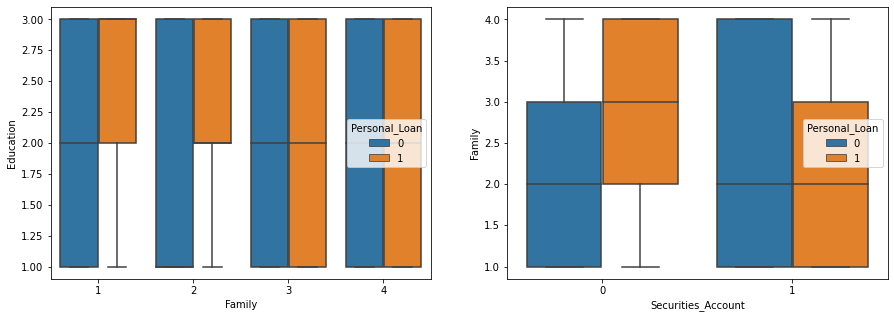

<IPython.core.display.Javascript object>

In [42]:
fig, axes = plt.subplots(1, 2, sharex=False, figsize=(15, 5))
sns.boxplot(data=data, x="Family", y="Education", hue=data["Personal_Loan"], ax=axes[0])
sns.boxplot(
    data=data, x="Securities_Account", y="Family", hue=data["Personal_Loan"], ax=axes[1]
)

<font color = 'darkblue'>
Cusomers with personal loands - majorly singles with security accounts, without personal loans - larger families with 4 members and no secirity accounts

#### CD_Account

<AxesSubplot:xlabel='CD_Account', ylabel='CreditCard'>

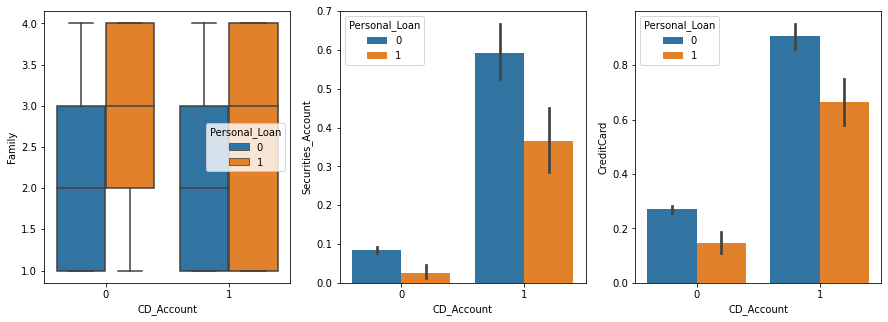

<IPython.core.display.Javascript object>

In [43]:
fig, axes = plt.subplots(1, 3, sharex=False, figsize=(15, 5))
sns.boxplot(
    data=data, x="CD_Account", y="Family", hue=data["Personal_Loan"], ax=axes[0]
)

sns.barplot(
    data=data,
    x="CD_Account",
    y="Securities_Account",
    hue=data["Personal_Loan"],
    ax=axes[1],
)

sns.barplot(
    data=data, x="CD_Account", y="CreditCard", hue=data["Personal_Loan"], ax=axes[2],
)

<font color = 'darkblue'>
    
* Cusotmers with personal loans more often hold CD accounts and are singles
* Cusotmers with personal loans more often hold CD accounts and security accounts togeather
* Cusotmers with personal loans more often hold more often hold CD accounts and credit cards in other banks

### EDA Summary and recommendations

Data analysis allowed to make key obervations regarding customers who are more likely to have a personal loan and this information can be used in targeting potential customers who are more likely interested in buing a personal loan

* Have higher income (60K+, IQR of 120-175K)
* Have higher educational degrees, graduate level and above, Advanced/Professional educated group being the majority
* Have larger families of 3 and 4, higher education of 2 and 3, owing CD Account and with higher Income, CCAvg and Mortgage
* Single customers with security accounts
* Single customers with CD accounts

* Average credit card spendings per month are higher with mean around 4K
* If customer has a mortgage, it will be a higher mortgage value (5.2K+)
* Loyal customers who do not have external credit cards
* More frequent users of online banking service
* Less likely to have a CD account
* Hold CD accounts and Security accounts togeather
* Hold CD accounts and credit cards in other banks
* Might have Hold CD accounts and Security accounts togeather

# 3. Data Pre-processing

### Dropping unnecessary and redundant columns

In [44]:
data.drop(
    ["Mortgage_Cropped", "Mortgage_Presence",], axis=1, inplace=True,
)

<IPython.core.display.Javascript object>

### Reducing dimensionality for Zipcodes

In [45]:
# Importing uszipcode database
from uszipcode import SearchEngine

search = SearchEngine(simple_zipcode=False)

<IPython.core.display.Javascript object>

In [46]:
# Creating variable "City" to summarize zipcodes by major_city parameter in uszipcode database
city = []
for i in np.arange(0, len(data["ZIPCode"])):
    zipcode = search.by_zipcode(data["ZIPCode"][i])
    city.append(zipcode.major_city)

data["City"] = city
data.head()

Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   25           1      49    91107       4    1.6          1         0   
1   45          19      34    90089       3    1.5          1         0   
2   39          15      11    94720       1    1.0          1         0   
3   35           9     100    94112       1    2.7          2         0   
4   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  \
0              0                   1           0       0           0   
1              0                   1           0       0           0   
2              0                   0           0       0           0   
3              0                   0           0       0           0   
4              0                   0           0       0           1   

            City  
0       Pasadena  
1    Los Angeles  
2       Berkeley  
3  San Francisco  
4     Northridge

<IPython.core.display.Javascript object>

In [47]:
# Creating variable "County" to summarize zipcodes by county parameter in uszipcode database
county = []
for i in np.arange(0, len(data["ZIPCode"])):
    zipcode = search.by_zipcode(data["ZIPCode"][i])
    county.append(zipcode.county)

data["County"] = county
data.head()

Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   25           1      49    91107       4    1.6          1         0   
1   45          19      34    90089       3    1.5          1         0   
2   39          15      11    94720       1    1.0          1         0   
3   35           9     100    94112       1    2.7          2         0   
4   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  \
0              0                   1           0       0           0   
1              0                   1           0       0           0   
2              0                   0           0       0           0   
3              0                   0           0       0           0   
4              0                   0           0       0           1   

            City                County  
0       Pasadena    Los Angeles County  
1    Los Angeles    Los Angeles County  
2       Berkeley        Alameda County  
3  San Francisco  San Francisco County  
4     Northridge    Los Angeles County

<IPython.core.display.Javascript object>

In [48]:
# Checking if missing values exist after procedure
data.isnull().sum()

Age                    0
Experience             0
Income                 0
ZIPCode                0
Family                 0
CCAvg                  0
Education              0
Mortgage               0
Personal_Loan          0
Securities_Account     0
CD_Account             0
Online                 0
CreditCard             0
City                  34
County                34
dtype: int64

<IPython.core.display.Javascript object>

In [49]:
# Locating missing values in "City" and "County"
data.loc[(data["City"].isnull()) & (data["County"].isnull())]

Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
106    43          17      69    92717       4   2.90          1         0   
172    38          13     171    92717       2   7.80          1         0   
184    52          26      63    92717       2   1.50          2         0   
321    44          20     101    92717       3   4.40          2        82   
366    50          24      35    92717       1   0.30          3         0   
384    51          25      21    93077       4   0.60          3         0   
468    34          10      21    92634       1   0.50          3         0   
476    60          34      53    92717       1   0.80          2         0   
630    32           7      35    96651       3   1.30          1       108   
672    51          27      23    96651       1   0.20          1         0   
695    29           4     115    92717       1   1.90          1         0   
721    49          24      39    92717       1   1.40          3         0   
780    32           7      42    92634       4   0.80          1         0   
1099   30           6      52    92717       3   0.70          2         0   
1189   42          17     115    92717       2   0.40          1         0   
1426   37          11      60    96651       3   0.50          3         0   
1483   58          32      63    92717       1   1.60          1         0   
1653   26           1      24    96651       2   0.90          3       123   
1752   33           8     155    92717       1   7.40          3         0   
1844   65          40      21    92717       3   0.10          3         0   
2049   43          18      94    92717       4   1.10          2         0   
2211   39          14      31    92717       2   1.40          2        94   
2218   38          13       9    92634       2   0.30          2         0   
2428   39          12     108    92717       4   3.67          2       301   
2486   61          36     130    92717       1   1.30          1       257   
2731   29           5      28    96651       1   0.20          3         0   
2957   61          36      53    92717       3   0.50          2         0   
3525   59          34      13    96651       4   0.90          2         0   
3887   24           0     118    92634       2   7.20          1         0   
4090   42          18      49    92717       3   2.10          3         0   
4276   50          24     155    92717       1   7.30          1         0   
4321   27           0      34    92717       1   2.00          2       112   
4384   45          20      61    92717       3   2.70          2         0   
4392   52          27      81    92634       4   3.80          2         0   

      Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  City  \
106               0                   0           0       1           1  None   
172               0                   0           0       1           0  None   
184               0                   1           0       1           0  None   
321               1                   0           0       0           0  None   
366               0                   0           0       1           0  None   
384               0                   0           0       1           1  None   
468               0                   0           0       1           0  None   
476               0                   1           0       0           1  None   
630               0                   0           0       0           1  None   
672               0                   0           0       1           0  None   
695               0                   0           0       0           0  None   
721               0                   0           0       1           0  None   
780               0                   0           0       1           1  None   
1099              0                   0           0       1           0  None   
1189              0                   0           0       1 

<IPython.core.display.Javascript object>

In [50]:
# Replacing missing values
data["City"][data["ZIPCode"] == 92717] = "Irvine"
data["City"][data["ZIPCode"] == 92634] = "Fullerton"
data["City"][data["ZIPCode"] == 93077] = "City_93077"
data["City"][data["ZIPCode"] == 96651] = "City_96651"
data["County"][data["ZIPCode"] == 92717] = "Orange"
data["County"][data["ZIPCode"] == 92634] = "Orange"
data["County"][data["ZIPCode"] == 93077] = "County_93077"
data["County"][data["ZIPCode"] == 96651] = "County_96651"

<IPython.core.display.Javascript object>

In [51]:
# Checking missing values in the result
data.isnull().sum()

Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
City                  0
County                0
dtype: int64

<IPython.core.display.Javascript object>

### Log transformation for CCAvg and Mortgage variables

In [52]:
cols_to_log = ["CCAvg", "Mortgage"]
for colname in cols_to_log:
    data[colname + "_log"] = np.log(data[colname] + 1)
# data.drop(cols_to_log, axis=1, inplace=False)
data.head()

Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   25           1      49    91107       4    1.6          1         0   
1   45          19      34    90089       3    1.5          1         0   
2   39          15      11    94720       1    1.0          1         0   
3   35           9     100    94112       1    2.7          2         0   
4   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  \
0              0                   1           0       0           0   
1              0                   1           0       0           0   
2              0                   0           0       0           0   
3              0                   0           0       0           0   
4              0                   0           0       0           1   

            City                County  CCAvg_log  Mortgage_log  
0       Pasadena    Los Angeles County   0.955511           0.0  
1    Los Angeles    Los Angeles County   0.916291           0.0  
2       Berkeley        Alameda County   0.693147           0.0  
3  San Francisco  San Francisco County   1.308333           0.0  
4     Northridge    Los Angeles County   0.693147           0.0

<IPython.core.display.Javascript object>

### Making categoricals into categorical types

In [53]:
cat_vars = ["Family", "Education"]

for colname in cat_vars:
    data[colname] = data[colname].astype("category")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   ZIPCode             5000 non-null   int64   
 4   Family              5000 non-null   category
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   category
 7   Mortgage            5000 non-null   int64   
 8   Personal_Loan       5000 non-null   int64   
 9   Securities_Account  5000 non-null   int64   
 10  CD_Account          5000 non-null   int64   
 11  Online              5000 non-null   int64   
 12  CreditCard          5000 non-null   int64   
 13  City                5000 non-null   object  
 14  County              5000 non-null   object  
 15  CCAvg_log           5000 non-null   fl

<IPython.core.display.Javascript object>

In [54]:
data.head(2)

Age  Experience  Income  ZIPCode Family  CCAvg Education  Mortgage  \
0   25           1      49    91107      4    1.6         1         0   
1   45          19      34    90089      3    1.5         1         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  \
0              0                   1           0       0           0   
1              0                   1           0       0           0   

          City              County  CCAvg_log  Mortgage_log  
0     Pasadena  Los Angeles County   0.955511           0.0  
1  Los Angeles  Los Angeles County   0.916291           0.0

<IPython.core.display.Javascript object>

**Exloring various variable combinations**

* Several models with various variable combinations will be tested and their impact on Logistic Regression and Decision Tree explored
* Only optimal combination will be used as below as a final version, other combination results outlined at the end of the Logistic Regression section

In [55]:
# Creating predicting and target sets

X = data.drop(
    ["Personal_Loan", "Experience", "Mortgage", "CCAvg", "County", "City"],
    axis=1,
    inplace=False,
)
X = pd.get_dummies(X, drop_first=True)
y = data["Personal_Loan"]
X.head(2)

Age  Income  ZIPCode  Securities_Account  CD_Account  Online  CreditCard  \
0   25      49    91107                   1           0       0           0   
1   45      34    90089                   1           0       0           0   

   CCAvg_log  Mortgage_log  Family_2  Family_3  Family_4  Education_2  \
0   0.955511           0.0         0         0         1            0   
1   0.916291           0.0         0         1         0            0   

   Education_3  
0            0  
1            0

<IPython.core.display.Javascript object>

In [56]:
# Splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1
)

<IPython.core.display.Javascript object>

In [57]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 3500
Number of rows in test data = 1500


<IPython.core.display.Javascript object>

In [58]:
print(
    "{0:0.2f}% data is in training set".format((len(X_train) / len(data.index)) * 100)
)
print("{0:0.2f}% data is in test set".format((len(X_test) / len(data.index)) * 100))

70.00% data is in training set
30.00% data is in test set


<IPython.core.display.Javascript object>

In [59]:
print(
    "Original Personal Loans True Values    : {0} ({1:0.2f}%)".format(
        len(data.loc[data["Personal_Loan"] == 1]),
        (len(data.loc[data["Personal_Loan"] == 1]) / len(data.index)) * 100,
    )
)
print(
    "Original Personal Loans False Values   : {0} ({1:0.2f}%)".format(
        len(data.loc[data["Personal_Loan"] == 0]),
        (len(data.loc[data["Personal_Loan"] == 0]) / len(data.index)) * 100,
    )
)
print("")
print(
    "Training Personal Loans True Values    : {0} ({1:0.2f}%)".format(
        len(y_train[y_train[:] == 1]),
        (len(y_train[y_train[:] == 1]) / len(y_train)) * 100,
    )
)
print(
    "Training Personal Loans False Values   : {0} ({1:0.2f}%)".format(
        len(y_train[y_train[:] == 0]),
        (len(y_train[y_train[:] == 0]) / len(y_train)) * 100,
    )
)
print("")
print(
    "Test Personal Loans True Values        : {0} ({1:0.2f}%)".format(
        len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1]) / len(y_test)) * 100
    )
)
print(
    "Test Personal Loans False Values       : {0} ({1:0.2f}%)".format(
        len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0]) / len(y_test)) * 100
    )
)
print("")

Original Personal Loans True Values    : 480 (9.60%)
Original Personal Loans False Values   : 4520 (90.40%)

Training Personal Loans True Values    : 331 (9.46%)
Training Personal Loans False Values   : 3169 (90.54%)

Test Personal Loans True Values        : 149 (9.93%)
Test Personal Loans False Values       : 1351 (90.07%)



<IPython.core.display.Javascript object>

# 4. Building Logistic Regression Model

In [60]:
# Fit the model on train
model = LogisticRegression(solver="newton-cg", random_state=1)
model.fit(X_train, y_train)
# predict on test
# y_predict = model.predict(x_test)

LogisticRegression(random_state=1, solver='newton-cg')

<IPython.core.display.Javascript object>

<font color = 'darkblue'>
Solver ‘liblinear’ was also tested and showed improve in Recall for AUC-ROC curve and decrease using Precision-Recall curve
    
F1_Score showed significant decrease using various improvement methods

### Coefficients

In [61]:
log_odds = model.coef_[0]
pd.DataFrame(log_odds, X_train.columns, columns=["coef"]).T

Age    Income   ZIPCode  Securities_Account  CD_Account    Online  \
coef  0.004003  0.055299 -0.000132           -0.670934    2.905835 -0.485035   

      CreditCard  CCAvg_log  Mortgage_log  Family_2  Family_3  Family_4  \
coef   -0.744746   1.119544      0.038274 -0.142552   2.11593    1.3736   

      Education_2  Education_3  
coef     3.254452     3.463194

<IPython.core.display.Javascript object>

#### Coefficient interpretations


<font color = 'darkblue'>
    
* Coefficients of ZIPCode, Securities_Account, Online, CreditCard, Family of 2 are negative. Increase in these variables will decrease the probabiltiy of customer applying for a personal loan
    
*  Coefficients of Age, Income, CCAvg, Mortgage, CD_Account, Family of 3 and 4 and Education are positibe. Increase in these variables will increase the probabiltiy of customer applying for a personal loan

#### Converting coefficients to odds
* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients. 
* Therefore, **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**

In [62]:
# converting coefficients to odds
odds = np.exp(model.coef_[0])

# finding the percentage change
perc_change_odds = (np.exp(model.coef_[0]) - 1) * 100

pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train.columns).T

Age    Income   ZIPCode  Securities_Account   CD_Account  \
Odds         1.004011  1.056857  0.999868            0.511231    18.280500   
Change_odd%  0.401058  5.685708 -0.013242          -48.876901  1728.049989   

                Online  CreditCard   CCAvg_log  Mortgage_log   Family_2  \
Odds          0.615676    0.474855    3.063458      1.039016   0.867143   
Change_odd% -38.432442  -52.514518  206.345826      3.901564 -13.285722   

               Family_3    Family_4  Education_2  Education_3  
Odds           8.297298    3.949545    25.905419    31.918775  
Change_odd%  729.729829  294.954537  2490.541876  3091.877472

<IPython.core.display.Javascript object>

#### Coefficient interpretations, odds

<font color = 'darkblue'>
    
* `Age`: Holding all other features constant a 1 unit change in Age will increase the odds of a person having a personal loan by 1 times or a 0.4% increase in odds of having a personal loan.
* `Income`: Holding all other features constant a 1 unit change in the Income will increase the odds of a person having a personal loan by 1.06 times or a 5.69% increase in odds of having a personal loan.
* `CCAvg`: Holding all other features constant a 1 unit change in the CCAvg will increase the odds of a person having a personal loan by 3.06 times or a 206.35% increase in odds of having a personal loan.
* `Mortgage`: Holding all other features constant a 1 unit change in the Mortgage will increase the odds of a person having a personal loan by 1.03 times or a 3.9% increase in odds of having a personal loan.
* `Securities_Account`: Holding all other features constant a 1 unit change in the Securities_Account will decrease the odds of a person having a personal loan by 0.51 times or a 48.88% decrease in odds of having a personal loan.
* `CD_Account`: Holding all other features constant a 1 unit change in the CD_Account will increase the odds of a person having a personal loan by 18.28 times or a 11728.05% increase in odds of having a personal loan.

`Interpretation for other attributes can be done similarly.`

## Model performance analysis

### Model evaluation criterion
#### Model can make wrong predictions as:
1. Predicting a customer buys a personal loan but in reality does not
2. Predicting a person does not buy a personal loan but in reality does not

#### Which Loss is greater ? (Which case is more important?)
* If we predict a customer is potentially willing to buy a personal loan, but in reality he was not interested, we waste resources on targeting thi customer, loss of resources

* If we predict a customer not falling in category of potential personal loaners and we exclude him from our campaign efforts, but in reality he was potentially interested once approached, we lose a potential customer, loss of opportunity

* Both the cases are generally important from the bank standpoint, however in case of expanding marketing campaign to target potential personal loaners, loss of opportunity would be the primary, hence we should focus on minimizing False Negatives

#### How to reduce this loss i.e need to reduce False Negatives (/False Positives) ?
*  `Recall` should be maximized, the greater the Recall higher the chances of identifying both classes correctly
* However understanding that lost or resources might be equally important for the bank, we need to monitor `F1_Score` as well as a secondary measure

### Let's create functions to calculate various other metrics and confusion matrix so that we don't have to use the same code repeatedly for each model
* The model_performance_classification_sklearn_with_threshold function will be used to check the model performance of models. 
* The confusion_matrix_sklearn_with_threshold function will be used to plot confusion matrix.

In [63]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn_with_threshold(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics, based on the threshold specified, to check classification model performance
    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    # predicting using the independent variables
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    pred = np.round(pred_thres)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [64]:
# defining a function to plot the confusion_matrix of a classification model built using sklearn
def confusion_matrix_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix, based on the threshold specified, with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    y_pred = np.round(pred_thres)

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(4, 2))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

**Checking model performance on training set**

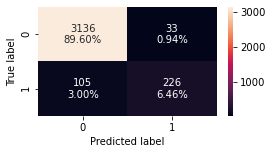

<IPython.core.display.Javascript object>

In [65]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(model, X_train, y_train)

In [66]:
# Printing metrics
log_reg_model_train_perf = model_performance_classification_sklearn_with_threshold(
    model, X_train, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


Accuracy    Recall  Precision        F1
0  0.960571  0.682779   0.872587  0.766102

<IPython.core.display.Javascript object>

**Checking model performance on test set**

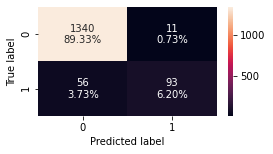

<IPython.core.display.Javascript object>

In [67]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(model, X_test, y_test)

In [68]:
log_reg_model_test_perf = model_performance_classification_sklearn_with_threshold(
    model, X_test, y_test
)

print("Test set performance:")
log_reg_model_test_perf

Test set performance:


Accuracy    Recall  Precision        F1
0  0.955333  0.624161   0.894231  0.735178

<IPython.core.display.Javascript object>

### ROC-AUC

**ROC-AUC on training set**

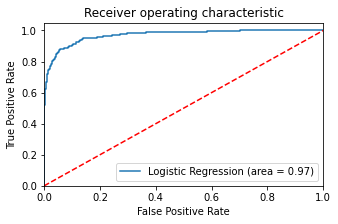

<IPython.core.display.Javascript object>

In [69]:
logit_roc_auc_train = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])
fpr, tpr, thresholds = roc_curve(y_train, model.predict_proba(X_train)[:, 1])
plt.figure(figsize=(5, 3))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

**ROC-AUC on test set**

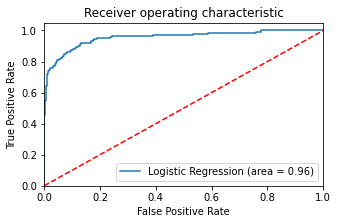

<IPython.core.display.Javascript object>

In [70]:
logit_roc_auc_test = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(5, 3))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_test)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

## Model Performance Improvement
Let's see if the Recall score can be improved further, by changing the model threshold using AUC-ROC Curve

### 1. Optimal threshold using AUC-ROC curve

In [71]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, model.predict_proba(X_train)[:, 1])

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.1678643432023378


<IPython.core.display.Javascript object>

**Checking model performance on training set**

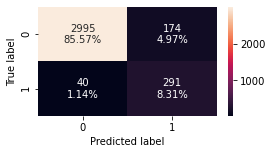

<IPython.core.display.Javascript object>

In [72]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    model, X_train, y_train, threshold=optimal_threshold_auc_roc
)

In [73]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    model, X_train, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


Accuracy    Recall  Precision        F1
0  0.938857  0.879154   0.625806  0.731156

<IPython.core.display.Javascript object>

**Checking model performance on test set**

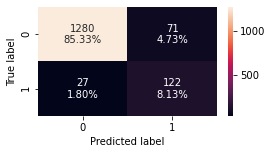

<IPython.core.display.Javascript object>

In [74]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    model, X_test, y_test, threshold=optimal_threshold_auc_roc
)

In [75]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    model, X_test, y_test, threshold=optimal_threshold_auc_roc
)
print("Test set performance:")
log_reg_model_test_perf_threshold_auc_roc

Test set performance:


Accuracy    Recall  Precision       F1
0  0.934667  0.818792   0.632124  0.71345

<IPython.core.display.Javascript object>

 **Observations:**
 
 <font color = 'darkblue'>
 
With optimal threshold of `0.17`
    
* Model performance has improved for Recall on training, but decreased for F1_Score (Recall from 0.68 to 0.88 and F1_Score from 0.77 to 0.73)
* Same for test data ((Recall from 0.62 to 0.82 and F1_Score from 0.74 to 0.71)

### 2. Let's use Precision-Recall curve and see if we can find a better threshold

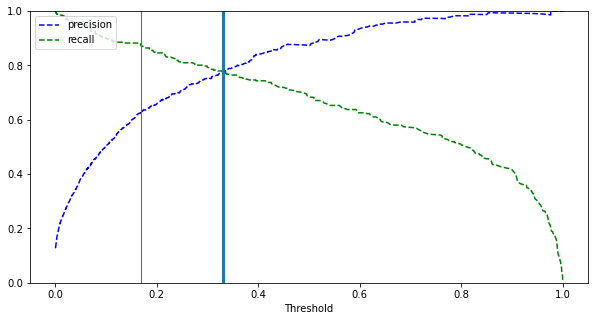

<IPython.core.display.Javascript object>

In [76]:
y_scores = model.predict_proba(X_train)[:, 1]
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])
    plt.axvline(x=0.33, linewidth=3)
    plt.axvline(x=0.17, linewidth=1)


plt.figure(figsize=(10, 5))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

<font color = 'darkblue'>
At the threshold of 0.33, we get balanced recall and precision should we choose to honor both metrics

In [77]:
# setting the threshold to a desired number using Precision-Recall curves
optimal_threshold_curve = 0.33

<IPython.core.display.Javascript object>

**Checking model performance on training set**

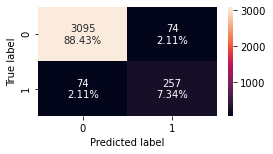

<IPython.core.display.Javascript object>

In [78]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    model, X_train, y_train, threshold=optimal_threshold_curve
)

In [79]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_sklearn_with_threshold(
    model, X_train, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


Accuracy    Recall  Precision        F1
0  0.957714  0.776435   0.776435  0.776435

<IPython.core.display.Javascript object>

**Checking model performance on test set**

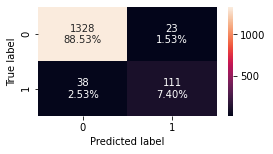

<IPython.core.display.Javascript object>

In [80]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    model, X_test, y_test, threshold=optimal_threshold_curve
)

In [81]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_sklearn_with_threshold(
    model, X_test, y_test, threshold=optimal_threshold_curve
)
print("Test set performance:")
log_reg_model_test_perf_threshold_curve

Test set performance:


Accuracy    Recall  Precision        F1
0  0.959333  0.744966   0.828358  0.784452

<IPython.core.display.Javascript object>

### Model Performance Summary

In [82]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.17 Threshold",
    "Logistic Regression-0.33 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression sklearn  Logistic Regression-0.17 Threshold  \
Accuracy                      0.960571                            0.938857   
Recall                        0.682779                            0.879154   
Precision                     0.872587                            0.625806   
F1                            0.766102                            0.731156   

           Logistic Regression-0.33 Threshold  
Accuracy                             0.957714  
Recall                               0.776435  
Precision                            0.776435  
F1                                   0.776435

<IPython.core.display.Javascript object>

In [83]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.17 Threshold",
    "Logistic Regression-0.33 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Logistic Regression sklearn  Logistic Regression-0.17 Threshold  \
Accuracy                      0.955333                            0.934667   
Recall                        0.624161                            0.818792   
Precision                     0.894231                            0.632124   
F1                            0.735178                            0.713450   

           Logistic Regression-0.33 Threshold  
Accuracy                             0.959333  
Recall                               0.744966  
Precision                            0.828358  
F1                                   0.784452

<IPython.core.display.Javascript object>

 **Observations:**
 
 <font color = 'darkblue'>
 
Comparing thresholds of `0.17` and `0.33`:
    
* Model performance has decreased for Recall on training, but improved F1_Score (Recall from 0.88 to 0.77 and F1_Score from 0.73 to 0.78)
* Same for test data ((Recall from 0.82 to 0.75 and F1_Score from 0.72 to 0.78)
                      
Overall Thershold of 0.33 gives more satisfactory results to balance losses of resources and opportunities for the bank

**Other variable variations were tested:**

`Logistic Regression with Zipcodes categorized by County was tested`

**Traning metrics:**

*--------------------Default-----0.17 Threshold-----0.32 Threshold
* Accuracy---0.963143----------0.942571----------0.960571
* Recall-------0.694864----------0.876133----------0.788520
* Precision---0.891473----------0.644444----------0.793313
* F1------------0.780985----------0.742638----------0.790909

**Test metrics:**

*--------------------Default-----0.17 Threshold-----0.32 Threshold
* Accuracy---0.952667----------0.934000----------0.958667
* Recall-------0.590604----------0.791946----------0.731544
* Precision---0.897959----------0.63440----------0.832061
* F1------------0.712551----------0.704478----------0.778571

There is slight improvement in training metrics, however slight decrease in test metrics therefore encoding by County is disregarded


`Logistic Regression with Zipcodes categorized by City was tested`

**Traning metrics:**

*--------------Default-----0.17 Threshold-----0.32 Threshold
* Accuracy---0.965143----------0.959714----------0.963143
* Recall-------0.706949----------0.876133----------0.803625
* Precision---0.903475----------0.743590----------0.806061
* F1------------0.793220----------0.804438----------0.804841

**Test metrics:**

*--------------Default-----0.17 Threshold-----0.32 Threshold
* Accuracy---0.952667----------0.950000----------0.954667
* Recall-------0.590604----------0.765101----------0.704698
* Precision---0.897959----------0.740260----------0.813953
* F1------------0.712551----------0.752475----------0.755396

There is an improvement in training metrics, however decrease in test metrics therefore encoding by City is disregarded

`Logistic Regression with CCAvg and Mortgage in original scale was tested`

**Traning metrics:**

*--------------Default-----0.17 Threshold-----0.33 Threshold
* Accuracy---0.959143----------0.932000----------0.956571
* Recall-------0.661631----------0.882175----------0.770393
* Precision---0.876000----------0.594705----------0.770393
* F1------------0.753873----------0.710462----------0.770393

**Test metrics:**

*--------------Default-----0.17 Threshold-----0.33 Threshold
* Accuracy---0.954667----------0.926000----------0.960000
* Recall-------0.610738----------0.832215----------0.744966
* Precision---0.900990----------0.590476----------0.834586
* F1------------0.728000----------0.690808----------0.787234

<font color = 'darkblue'>
    
There is not a big difference in regression metrics, however regression coefficint odds change significatly for Mortgage(Odds 1.000822, Change_odd%	0.082193 to Odds 1.039016, Change_odd% 3.901564) and CCAvg(Odds 1.247508, Change_odd%	24.750822 to Odds 3.063458, Change_odd% 206.345826), therefore will be using CCAvg and Mortgage in log scale for classifications and ZIPCode in coninuous format

# 5. Build Decision Tree Model

In [84]:
# Creating new predicting and target sets as Decision Tree might require different combination of variable than Logistic Regression
X = data.drop(
    ["Personal_Loan", "Mortgage", "CCAvg", "County", "City"], axis=1, inplace=False,
)
X = pd.get_dummies(X, drop_first=True)
y = data["Personal_Loan"]
X.head(2)

Age  Experience  Income  ZIPCode  Securities_Account  CD_Account  Online  \
0   25           1      49    91107                   1           0       0   
1   45          19      34    90089                   1           0       0   

   CreditCard  CCAvg_log  Mortgage_log  Family_2  Family_3  Family_4  \
0           0   0.955511           0.0         0         0         1   
1           0   0.916291           0.0         0         1         0   

   Education_2  Education_3  
0            0            0  
1            0            0

<IPython.core.display.Javascript object>

In [85]:
# Splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1
)

<IPython.core.display.Javascript object>

### 1. Building Full Decision Tree
Classes are highly imbalanced with 1:10 ratio, therefore weights will be used in Decision Tree models

In [86]:
model = DecisionTreeClassifier(
    criterion="gini", class_weight={0: 0.1, 1: 0.9}, random_state=1
)
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.1, 1: 0.9}, random_state=1)

<IPython.core.display.Javascript object>

### Model evaluation criterion
Is the same as for Logistic Regression, we are looking to maximize Recall to reduce False Negatives

### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_sklearn function will be used to check the model performance of models. 
* The make_confusion_matrix function will be used to plot confusion matrix.
* The get_recall_score function will be used to check the model performance of models. 

In [87]:
def confusion_matrix_sklearn(model, predictors, target):
    """To plot the confusion_matrix with percentages
    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(4, 2))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

In [88]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """Function to compute different metrics to check classification model performance
    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )
    return df_perf

<IPython.core.display.Javascript object>

#### Checking model performance on training set

In [89]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

<IPython.core.display.Javascript object>

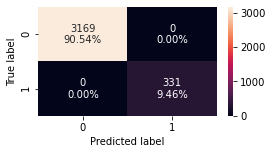

<IPython.core.display.Javascript object>

In [90]:
confusion_matrix_sklearn(model, X_train, y_train)

#### Checking model performance on test set

In [91]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

Accuracy    Recall  Precision        F1
0  0.975333  0.865772   0.883562  0.874576

<IPython.core.display.Javascript object>

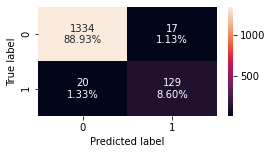

<IPython.core.display.Javascript object>

In [92]:
confusion_matrix_sklearn(model, X_test, y_test)

#### Visualizing the Decision Tree

In [93]:
feature_names = list(X.columns)
print(feature_names)

['Age', 'Experience', 'Income', 'ZIPCode', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'CCAvg_log', 'Mortgage_log', 'Family_2', 'Family_3', 'Family_4', 'Education_2', 'Education_3']


<IPython.core.display.Javascript object>

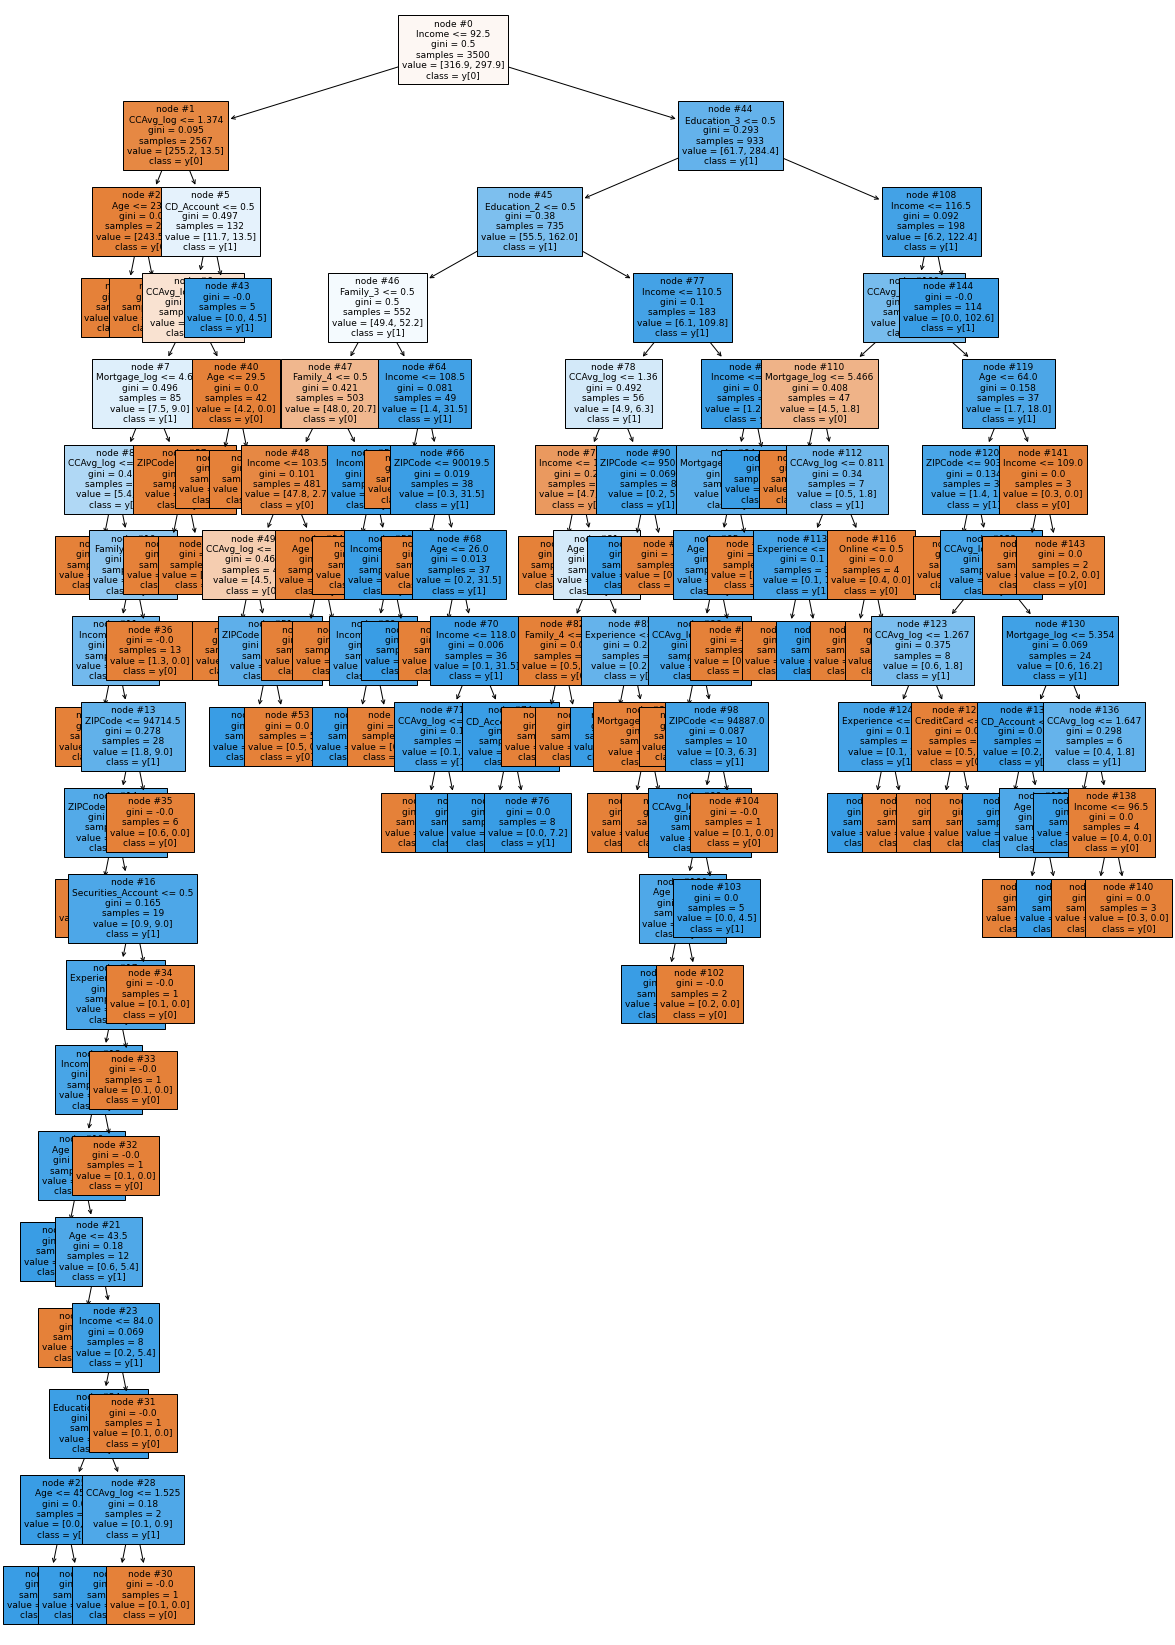

<IPython.core.display.Javascript object>

In [94]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [95]:
# Text report showing the rules of a decision tree -
print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg_log <= 1.37
|   |   |--- Age <= 23.50
|   |   |   |--- weights: [0.70, 0.00] class: 0
|   |   |--- Age >  23.50
|   |   |   |--- weights: [242.80, 0.00] class: 0
|   |--- CCAvg_log >  1.37
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg_log <= 1.60
|   |   |   |   |--- Mortgage_log <= 4.64
|   |   |   |   |   |--- CCAvg_log <= 1.40
|   |   |   |   |   |   |--- weights: [1.50, 0.00] class: 0
|   |   |   |   |   |--- CCAvg_log >  1.40
|   |   |   |   |   |   |--- Family_4 <= 0.50
|   |   |   |   |   |   |   |--- Income <= 67.00
|   |   |   |   |   |   |   |   |--- weights: [0.80, 0.00] class: 0
|   |   |   |   |   |   |   |--- Income >  67.00
|   |   |   |   |   |   |   |   |--- ZIPCode <= 94714.50
|   |   |   |   |   |   |   |   |   |--- ZIPCode <= 90437.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [0.30, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |--- ZIPCode >  90437.50
|   |   |   |   |   |   |   |   |   |   |--- Securiti

<IPython.core.display.Javascript object>

In [96]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )
print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                             Imp
Income              6.277939e-01
CCAvg_log           9.515377e-02
Family_4            8.083925e-02
Education_2         6.628501e-02
Family_3            6.237187e-02
Education_3         2.259653e-02
Mortgage_log        1.278058e-02
ZIPCode             1.082015e-02
Age                 1.015782e-02
CD_Account          7.802904e-03
Experience          2.854512e-03
Securities_Account  5.437069e-04
CreditCard          2.892087e-18
Online              2.024461e-18
Family_2            0.000000e+00


<IPython.core.display.Javascript object>

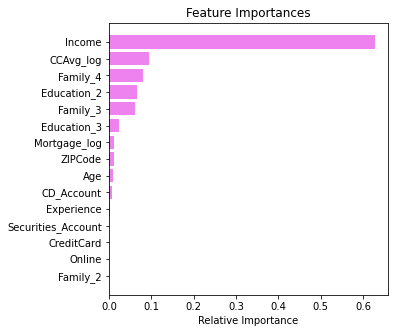

<IPython.core.display.Javascript object>

In [97]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(5, 5))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

<font color = 'darkblue'>
* According to the default decision tree model, Income is the most important variable followed by CCAvg, Family and Education

## Reducing over fitting
The default model built very complex tree. We will use pre-pruning and post-pruning approaches to reduce overfitting and then compare the results

### 2. Decision tree with depth restricted to 3

In [98]:
model1 = DecisionTreeClassifier(
    criterion="gini", class_weight={0: 0.1, 1: 0.9}, max_depth=3, random_state=1
)
model1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.1, 1: 0.9}, max_depth=3,
                       random_state=1)

<IPython.core.display.Javascript object>

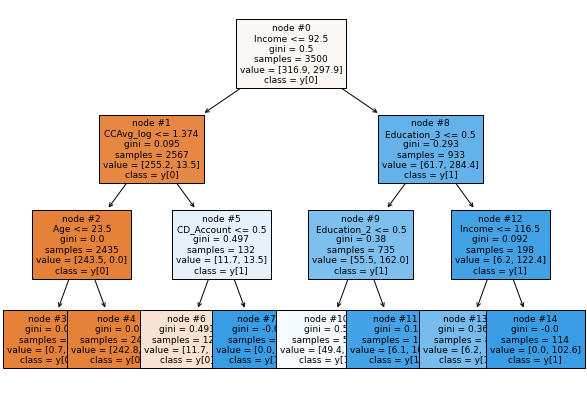

<IPython.core.display.Javascript object>

In [99]:
plt.figure(figsize=(10, 7))
out = tree.plot_tree(
    model1,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [100]:
# Text report showing the rules of a decision tree -
print(tree.export_text(model1, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg_log <= 1.37
|   |   |--- Age <= 23.50
|   |   |   |--- weights: [0.70, 0.00] class: 0
|   |   |--- Age >  23.50
|   |   |   |--- weights: [242.80, 0.00] class: 0
|   |--- CCAvg_log >  1.37
|   |   |--- CD_Account <= 0.50
|   |   |   |--- weights: [11.70, 9.00] class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- weights: [0.00, 4.50] class: 1
|--- Income >  92.50
|   |--- Education_3 <= 0.50
|   |   |--- Education_2 <= 0.50
|   |   |   |--- weights: [49.40, 52.20] class: 1
|   |   |--- Education_2 >  0.50
|   |   |   |--- weights: [6.10, 109.80] class: 1
|   |--- Education_3 >  0.50
|   |   |--- Income <= 116.50
|   |   |   |--- weights: [6.20, 19.80] class: 1
|   |   |--- Income >  116.50
|   |   |   |--- weights: [0.00, 102.60] class: 1



<IPython.core.display.Javascript object>

In [101]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )
print(
    pd.DataFrame(
        model1.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                             Imp
Income              8.101467e-01
Education_2         9.040521e-02
CCAvg_log           5.821268e-02
Education_3         3.074642e-02
CD_Account          1.048896e-02
Age                 1.740870e-14
Experience          0.000000e+00
ZIPCode             0.000000e+00
Securities_Account  0.000000e+00
Online              0.000000e+00
CreditCard          0.000000e+00
Mortgage_log        0.000000e+00
Family_2            0.000000e+00
Family_3            0.000000e+00
Family_4            0.000000e+00


<IPython.core.display.Javascript object>

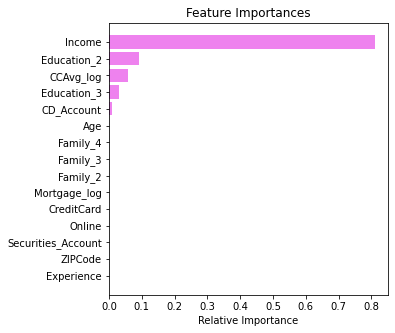

<IPython.core.display.Javascript object>

In [102]:
importances = model1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(5, 5))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

<font color = 'darkblue'>
* According to the reduced depth decision tree model, Income remains the most important variable followed by Education and CCAvg

### 3. Using GridSearch for Hyperparameter tuning of our tree model

In [103]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight={0: 0.1, 1: 0.9})

# Grid of parameters to choose from
## add from article
parameters = {
    "max_depth": [5, 10, 15, None],
    "min_samples_leaf": [1, 2, 5, 7, 10, 15, 20],
    "max_leaf_nodes": [2, 3, 5, 10],
    "min_impurity_decrease": [0.001, 0.01, 0.1],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

# Print the best parameters
print(grid_obj.best_params_)

{'criterion': 'entropy', 'max_depth': 5, 'max_leaf_nodes': 3, 'min_impurity_decrease': 0.001, 'min_samples_leaf': 1, 'splitter': 'best'}


<IPython.core.display.Javascript object>

#### Checking performance on training set

In [104]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

Accuracy  Recall  Precision        F1
0  0.790286     1.0   0.310798  0.474212

<IPython.core.display.Javascript object>

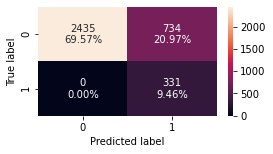

<IPython.core.display.Javascript object>

In [105]:
confusion_matrix_sklearn(estimator, X_train, y_train)

#### Checking model performance on test set

In [106]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)
decision_tree_tune_perf_test

Accuracy  Recall  Precision        F1
0  0.779333     1.0   0.310417  0.473768

<IPython.core.display.Javascript object>

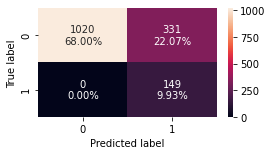

<IPython.core.display.Javascript object>

In [107]:
confusion_matrix_sklearn(estimator, X_test, y_test)

#### Visualizing the Decision Tree

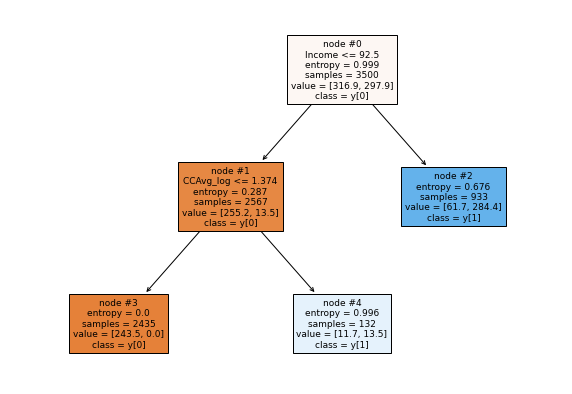

<IPython.core.display.Javascript object>

In [108]:
plt.figure(figsize=(10, 7))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [109]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg_log <= 1.37
|   |   |--- weights: [243.50, 0.00] class: 0
|   |--- CCAvg_log >  1.37
|   |   |--- weights: [11.70, 13.50] class: 1
|--- Income >  92.50
|   |--- weights: [61.70, 284.40] class: 1



<IPython.core.display.Javascript object>

In [110]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )
print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Income              0.853259
CCAvg_log           0.146741
Age                 0.000000
Experience          0.000000
ZIPCode             0.000000
Securities_Account  0.000000
CD_Account          0.000000
Online              0.000000
CreditCard          0.000000
Mortgage_log        0.000000
Family_2            0.000000
Family_3            0.000000
Family_4            0.000000
Education_2         0.000000
Education_3         0.000000


<IPython.core.display.Javascript object>

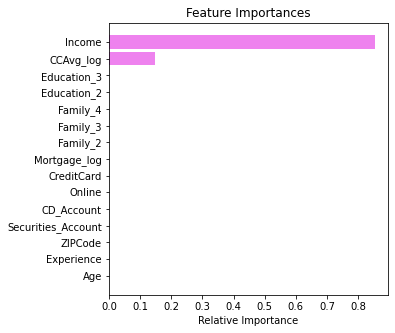

<IPython.core.display.Javascript object>

In [111]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(5, 5))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

<font color = 'darkblue'>
* Tuned hyperparameters changed the Importance distribution to Income still being the most important variable followed CCAvg only

### 4. Cost Complexity Pruning
We will look at cost complexity parameter, ``ccp_alpha`` to otpimize post-pruning results. Greater values of ``ccp_alpha``
increase the number of nodes pruned.

In [112]:
# Calculate various alphas and their associated impurities
clf = DecisionTreeClassifier(random_state=1, class_weight={0: 0.1, 1: 0.9})
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

<IPython.core.display.Javascript object>

In [113]:
# Print the table of alphas and impurities
pd.DataFrame(path)

ccp_alphas    impurities
0   0.000000e+00 -6.899346e-16
1   1.805828e-19 -6.897540e-16
2   3.611656e-19 -6.893929e-16
3   1.011264e-18 -6.883816e-16
4   1.444662e-18 -6.869370e-16
5   1.805828e-18 -6.851311e-16
6   2.437868e-18 -6.826933e-16
7   1.072662e-17 -6.719666e-16
8   1.300196e-17 -6.589647e-16
9   2.275343e-17 -6.362112e-16
10  1.642039e-16 -4.720073e-16
11  2.419448e-16 -2.300625e-16
12  6.375927e-15  6.145865e-15
13  1.596972e-04  3.193943e-04
14  1.617559e-04  6.429061e-04
15  1.621398e-04  9.671857e-04
16  3.079874e-04  1.275173e-03
17  3.081875e-04  1.583361e-03
18  3.081875e-04  1.891548e-03
19  3.105223e-04  2.823115e-03
20  3.199567e-04  3.143072e-03
21  3.208528e-04  3.784777e-03
22  3.212203e-04  4.427218e-03
23  4.068475e-04  6.461456e-03
24  5.323239e-04  6.993779e-03
25  5.753795e-04  7.569159e-03
26  6.202198e-04  8.809599e-03
27  6.273817e-04  9.436980e-03
28  6.784437e-04  1.147231e-02
29  7.485805e-04  1.222089e-02
30  7.828292e-04  1.300372e-02
31  7.840069e-04  1.535574e-02
32  8.273599e-04  1.618310e-02
33  9.647609e-04  1.714786e-02
34  1.176341e-03  1.832420e-02
35  1.372398e-03  1.969660e-02
36  1.435187e-03  2.113179e-02
37  1.682633e-03  2.281442e-02
38  2.208456e-03  2.723133e-02
39  2.328917e-03  2.956025e-02
40  2.909596e-03  3.246985e-02
41  3.240232e-03  3.571008e-02
42  3.393805e-03  3.910388e-02
43  3.470671e-03  4.604523e-02
44  3.841577e-03  4.988680e-02
45  4.980603e-03  5.984801e-02
46  5.881704e-03  6.572971e-02
47  5.974141e-03  7.170385e-02
48  2.132036e-02  9.302421e-02
49  2.840493e-02  2.066439e-01
50  2.928785e-01  4.995225e-01

<IPython.core.display.Javascript object>

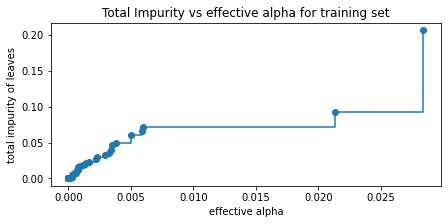

<IPython.core.display.Javascript object>

In [114]:
# Plotting impurity vs alpha
fig, ax = plt.subplots(figsize=(7, 3))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [115]:
# Creating models for each alpha from the table above and put them in the list format(initial list is empty)
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight={0: 0.1, 1: 0.9}
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.2928785401980041


<IPython.core.display.Javascript object>

For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.

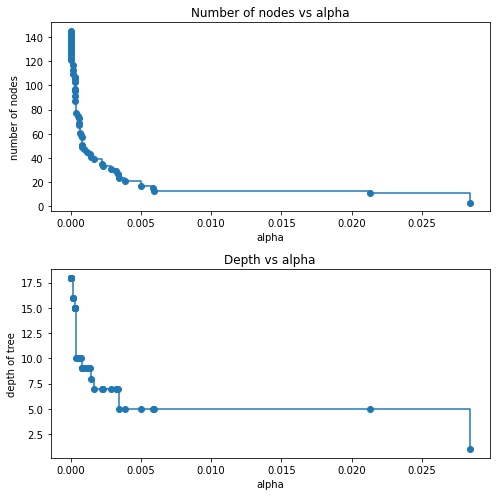

<IPython.core.display.Javascript object>

In [116]:
# Creating variables for number of nodes and depths for each model and plotting them
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(7, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

### Recall vs alpha for training and testing sets


In [117]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

<IPython.core.display.Javascript object>

In [118]:
# For test dataset
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

<IPython.core.display.Javascript object>

In [119]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

<IPython.core.display.Javascript object>

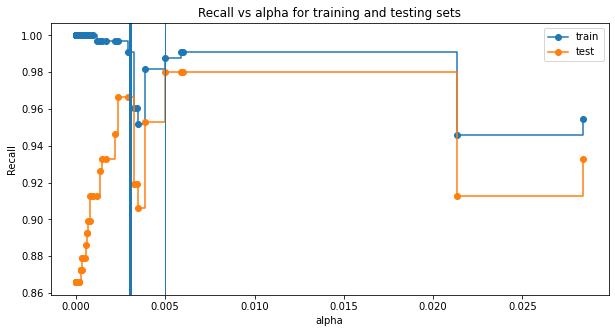

<IPython.core.display.Javascript object>

In [120]:
# Plotting recall vs alpha
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.axvline(x=0.004980603234981278, linewidth=1)
plt.axvline(x=0.003, linewidth=3)
plt.show()

In [121]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.004980603234981278,
                       class_weight={0: 0.1, 1: 0.9}, random_state=1)


<IPython.core.display.Javascript object>

In [122]:
best_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.004980603234981278,
                       class_weight={0: 0.1, 1: 0.9}, random_state=1)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

In [123]:
decision_tree_postpruned_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_postpruned_perf_train

Accuracy    Recall  Precision        F1
0  0.939143  0.987915   0.610075  0.754325

<IPython.core.display.Javascript object>

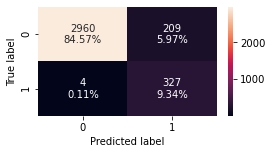

<IPython.core.display.Javascript object>

In [124]:
confusion_matrix_sklearn(best_model, X_train, y_train)

#### Checking model performance on test set

In [125]:
decision_tree_postpruned_perf_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_postpruned_perf_test

Accuracy    Recall  Precision        F1
0     0.938  0.979866   0.618644  0.758442

<IPython.core.display.Javascript object>

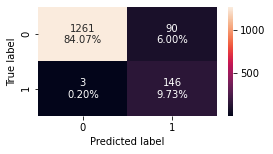

<IPython.core.display.Javascript object>

In [126]:
confusion_matrix_sklearn(best_model, X_test, y_test)

#### Visualizing the Decision Tree

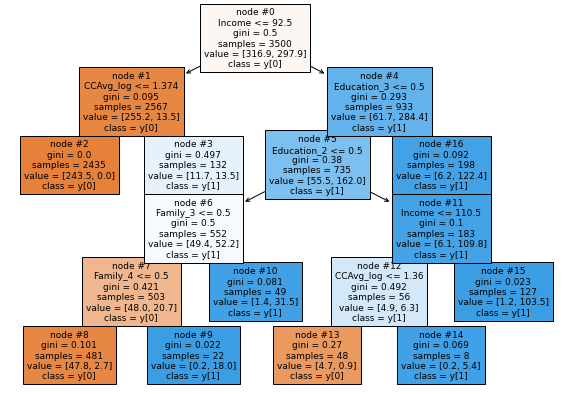

<IPython.core.display.Javascript object>

In [127]:
plt.figure(figsize=(10, 7))
out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [128]:
# Text report showing the rules of a decision tree -
print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg_log <= 1.37
|   |   |--- weights: [243.50, 0.00] class: 0
|   |--- CCAvg_log >  1.37
|   |   |--- weights: [11.70, 13.50] class: 1
|--- Income >  92.50
|   |--- Education_3 <= 0.50
|   |   |--- Education_2 <= 0.50
|   |   |   |--- Family_3 <= 0.50
|   |   |   |   |--- Family_4 <= 0.50
|   |   |   |   |   |--- weights: [47.80, 2.70] class: 0
|   |   |   |   |--- Family_4 >  0.50
|   |   |   |   |   |--- weights: [0.20, 18.00] class: 1
|   |   |   |--- Family_3 >  0.50
|   |   |   |   |--- weights: [1.40, 31.50] class: 1
|   |   |--- Education_2 >  0.50
|   |   |   |--- Income <= 110.50
|   |   |   |   |--- CCAvg_log <= 1.36
|   |   |   |   |   |--- weights: [4.70, 0.90] class: 0
|   |   |   |   |--- CCAvg_log >  1.36
|   |   |   |   |   |--- weights: [0.20, 5.40] class: 1
|   |   |   |--- Income >  110.50
|   |   |   |   |--- weights: [1.20, 103.50] class: 1
|   |--- Education_3 >  0.50
|   |   |--- weights: [6.20, 122.40] class: 1



<IPython.core.display.Javascript object>

In [129]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )
print(
    pd.DataFrame(
        best_model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Income              0.679714
Family_4            0.086636
Education_2         0.075308
Family_3            0.070862
CCAvg_log           0.061869
Education_3         0.025612
Age                 0.000000
Experience          0.000000
ZIPCode             0.000000
Securities_Account  0.000000
CD_Account          0.000000
Online              0.000000
CreditCard          0.000000
Mortgage_log        0.000000
Family_2            0.000000


<IPython.core.display.Javascript object>

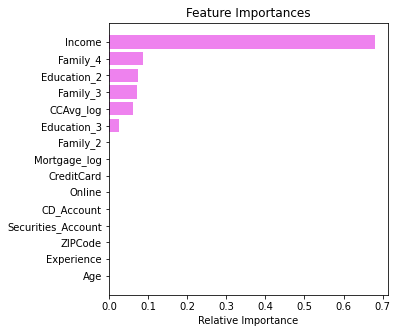

<IPython.core.display.Javascript object>

In [130]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(5, 5))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

<font color = 'darkblue'>
* Importance distribution still show Income being the most important variable followed Familym Educatio and CCAvg

**Creating model with 0.003 ccp_alpha**

In [131]:
best_model2 = DecisionTreeClassifier(
    ccp_alpha=0.003, class_weight={0: 0.1, 1: 0.9}, random_state=1
)
best_model2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.003, class_weight={0: 0.1, 1: 0.9},
                       random_state=1)

<IPython.core.display.Javascript object>

#### Checking performance on the training set

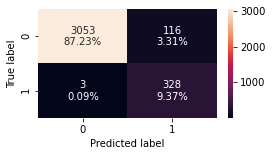

<IPython.core.display.Javascript object>

In [132]:
confusion_matrix_sklearn(best_model2, X_train, y_train)

In [133]:
decision_tree_postpruned_perf_train = model_performance_classification_sklearn(
    best_model2, X_train, y_train
)
decision_tree_postpruned_perf_train

Accuracy    Recall  Precision        F1
0     0.966  0.990937   0.738739  0.846452

<IPython.core.display.Javascript object>

#### Checking performance on the test set


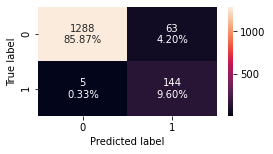

<IPython.core.display.Javascript object>

In [134]:
confusion_matrix_sklearn(best_model2, X_test, y_test)

In [135]:
decision_tree_postpruned_perf_test = model_performance_classification_sklearn(
    best_model2, X_test, y_test
)
decision_tree_postpruned_perf_test

Accuracy    Recall  Precision        F1
0  0.954667  0.966443   0.695652  0.808989

<IPython.core.display.Javascript object>

#### Visualizing the Decision Tree

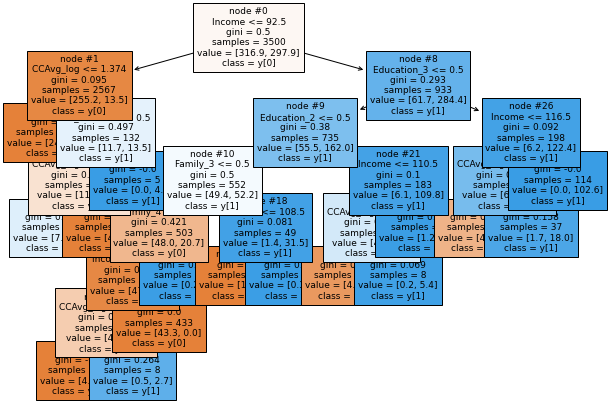

<IPython.core.display.Javascript object>

In [136]:
plt.figure(figsize=(10, 7))
out = tree.plot_tree(
    best_model2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [137]:
# Text report showing the rules of a decision tree -
print(tree.export_text(best_model2, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg_log <= 1.37
|   |   |--- weights: [243.50, 0.00] class: 0
|   |--- CCAvg_log >  1.37
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg_log <= 1.60
|   |   |   |   |--- weights: [7.50, 9.00] class: 1
|   |   |   |--- CCAvg_log >  1.60
|   |   |   |   |--- weights: [4.20, 0.00] class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- weights: [0.00, 4.50] class: 1
|--- Income >  92.50
|   |--- Education_3 <= 0.50
|   |   |--- Education_2 <= 0.50
|   |   |   |--- Family_3 <= 0.50
|   |   |   |   |--- Family_4 <= 0.50
|   |   |   |   |   |--- Income <= 103.50
|   |   |   |   |   |   |--- CCAvg_log <= 1.44
|   |   |   |   |   |   |   |--- weights: [4.00, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg_log >  1.44
|   |   |   |   |   |   |   |--- weights: [0.50, 2.70] class: 1
|   |   |   |   |   |--- Income >  103.50
|   |   |   |   |   |   |--- weights: [43.30, 0.00] class: 0
|   |   |   |   |--- Family_4 >  0.50
|   |   |   |   |   |--- weights:

<IPython.core.display.Javascript object>

In [138]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )
print(
    pd.DataFrame(
        best_model2.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Income              0.661398
CCAvg_log           0.087107
Family_4            0.081558
Education_2         0.070893
Family_3            0.066708
Education_3         0.024110
CD_Account          0.008225
Age                 0.000000
Experience          0.000000
ZIPCode             0.000000
Securities_Account  0.000000
Online              0.000000
CreditCard          0.000000
Mortgage_log        0.000000
Family_2            0.000000


<IPython.core.display.Javascript object>

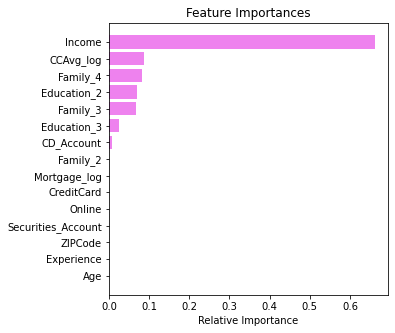

<IPython.core.display.Javascript object>

In [139]:
importances = best_model2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(5, 5))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

<font color = 'darkblue'>
* Final model Importance distribution has Income still being the most important variable followed CCAvg, Family and Education

## Comparing all the decision tree models

In [140]:
# training performance comparison
models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_postpruned_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                     1.0                     0.790286   
Recall                       1.0                     1.000000   
Precision                    1.0                     0.310798   
F1                           1.0                     0.474212   

           Decision Tree (Post-Pruning)  
Accuracy                       0.966000  
Recall                         0.990937  
Precision                      0.738739  
F1                             0.846452

<IPython.core.display.Javascript object>

Pre-pruned Decision Tree shows best parameters for Recall, however Post-pruned model has a good score for F1

In [141]:
# test performance comparison
models_train_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_postpruned_perf_test.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_train_comp_df

Test set performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                0.975333                     0.779333   
Recall                  0.865772                     1.000000   
Precision               0.883562                     0.310417   
F1                      0.874576                     0.473768   

           Decision Tree (Post-Pruning)  
Accuracy                       0.954667  
Recall                         0.966443  
Precision                      0.695652  
F1                             0.808989

<IPython.core.display.Javascript object>

Pre-pruned Decision Tree shows best parameters for Recall, however Post-pruned model has a good score for F1

# Actionable Insights & Recommendations


* Decision Tree model demostrated that Income has the most affect in whether customer has a personal loan or not.
* Larger families of 3 and 4 have higher probabilities of buing a personal loan
* Also, Education of graduate degree and higher has impact on the personal loan
* Average credit card monthly spendings have impact on personal loan

These conclusions are in line with recommendations given by EDA and should be used in framing the Marketing campaign

Data analysis allowed to make key obervations regarding customers who are more likely to have a personal loan and this information can be used in targeting potential customers who are more likely interested in buing a personal loan

Following customer profile should be taken into account to shape the campain:

* Have higher income (60K+, IQR of 120-175K)
* Have higher educational degrees, graduate level and above, Advanced/Professional educated group being the majority
* Have larger families of 3 and 4, higher education of 2 and 3, owing CD Account and with higher Income, CCAvg and Mortgage
* Single customers with security accounts
* Single customers with CD accounts

* Average credit card spendings per month are higher with mean around 4K
* If customer has a mortgage, it will be a higher mortgage value (5.2K+)
* Loyal customers who do not have external credit cards
* More frequent users of online banking service
* Less likely to have a CD account
* Hold CD accounts and Security accounts togeather
* Hold CD accounts and credit cards in other banks
* Might have Hold CD accounts and Security accounts togeather
